In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pickle

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# importing data
#

#data = np.load('data/KeplerSampleFullQ.npy')
with open('data/KeplerSampleFullQ.pkl','rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    data = u.load()

In [24]:
print(data.shape)
print(data[:,1].shape)
print(data[:,1][0].shape)
#plt.plot(data[0,0],data[0,1])
data2 = np.concatenate(data, axis=0 )
print(data2.shape)

(2500, 3)
(2500,)
(3534,)
(7500,)


(2500, 3534)


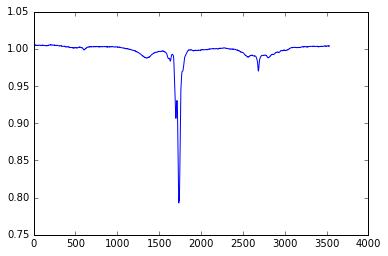

In [78]:
flux = np.zeros([2500,3534])
for i in range(2500):
    #print(data[i,1].shape[0])
    if data[i,1].shape[0] > 3534:
        flux[i] = data[i,1][:3534]
    else: flux[i] = data[i,1]

print(flux.shape)
plt.plot(flux[0])

(2500, 3534)


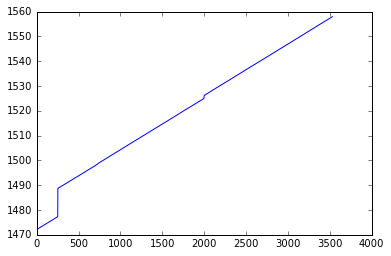

In [79]:
time = np.zeros([2500,3534])
for i in range(2500):
    if data[i,0].shape[0] > 3534:
        time[i] = data[i,0][:3534]
    else: time[i] = data[i,0]

print(time.shape)
plt.plot(time[0])

In [80]:
unc = np.zeros([2500,3534])
for i in range(2500):
    if data[i,2].shape[0] > 3534:
        unc[i] = data[i,2][:3534]
    else: unc[i] = data[i,2]

print(unc.shape)

(2500, 3534)


In [49]:
rng = np.random.RandomState(42)

outlier_idxs=[]

for i in range(100):

    # using first 500 objects to train
    clf = IsolationForest(max_samples=500, random_state=rng)
    clf.fit(flux[:500])

    #identify outliers in 2000 test set
    #data_test = flux[500:]
    scores = clf.decision_function(flux[500:])
    outlier_idxs_test = np.argsort(scores)[:100]
    outlier_idxs_n1 = outlier_idxs_test + 500
    outlier_idxs.append(outlier_idxs_n1)

In [68]:
print(sorted(outlier_idxs[10]))

[511, 519, 542, 569, 579, 585, 611, 619, 635, 671, 678, 696, 722, 819, 839, 897, 900, 904, 956, 971, 974, 1016, 1043, 1053, 1091, 1108, 1133, 1136, 1145, 1148, 1217, 1258, 1266, 1271, 1303, 1327, 1352, 1384, 1419, 1421, 1452, 1469, 1487, 1511, 1544, 1551, 1560, 1596, 1637, 1671, 1684, 1769, 1773, 1778, 1781, 1793, 1817, 1851, 1883, 1902, 1922, 1939, 1950, 1973, 1984, 2000, 2020, 2026, 2029, 2031, 2045, 2069, 2082, 2088, 2091, 2118, 2126, 2163, 2183, 2202, 2213, 2234, 2237, 2264, 2309, 2331, 2333, 2338, 2382, 2388, 2396, 2402, 2416, 2420, 2425, 2427, 2432, 2436, 2471, 2499]


In [64]:
new_set=set(outlier_idxs[0])
for i in range(100):
    new_set = new_set & set(outlier_idxs[i])

#print(len(outlier_twice))
#print(np.sort(outlier_idxs_dense))
#print(np.sort(outlier_idxs_sparse))
print(len(new_set))
print(sorted(new_set))

73
[511, 579, 585, 611, 635, 671, 678, 696, 722, 819, 897, 904, 956, 974, 1016, 1043, 1053, 1091, 1108, 1133, 1136, 1145, 1148, 1258, 1266, 1327, 1352, 1384, 1419, 1469, 1511, 1551, 1560, 1596, 1684, 1769, 1773, 1778, 1781, 1817, 1851, 1883, 1950, 1973, 1984, 2000, 2020, 2029, 2031, 2045, 2069, 2082, 2088, 2091, 2118, 2126, 2163, 2183, 2202, 2234, 2237, 2331, 2338, 2382, 2388, 2396, 2402, 2416, 2425, 2427, 2436, 2471, 2499]


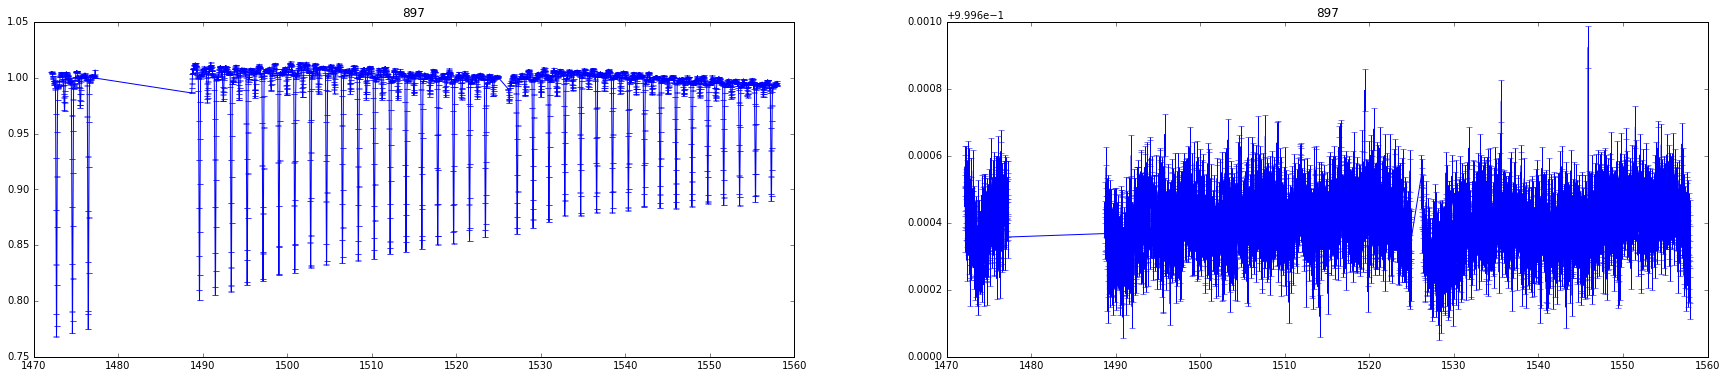

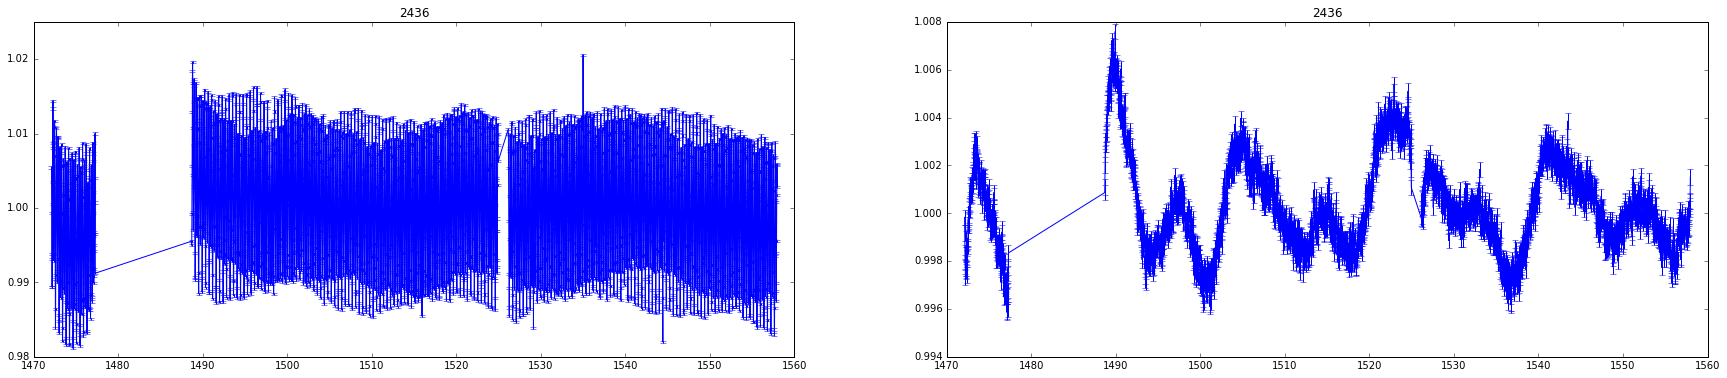

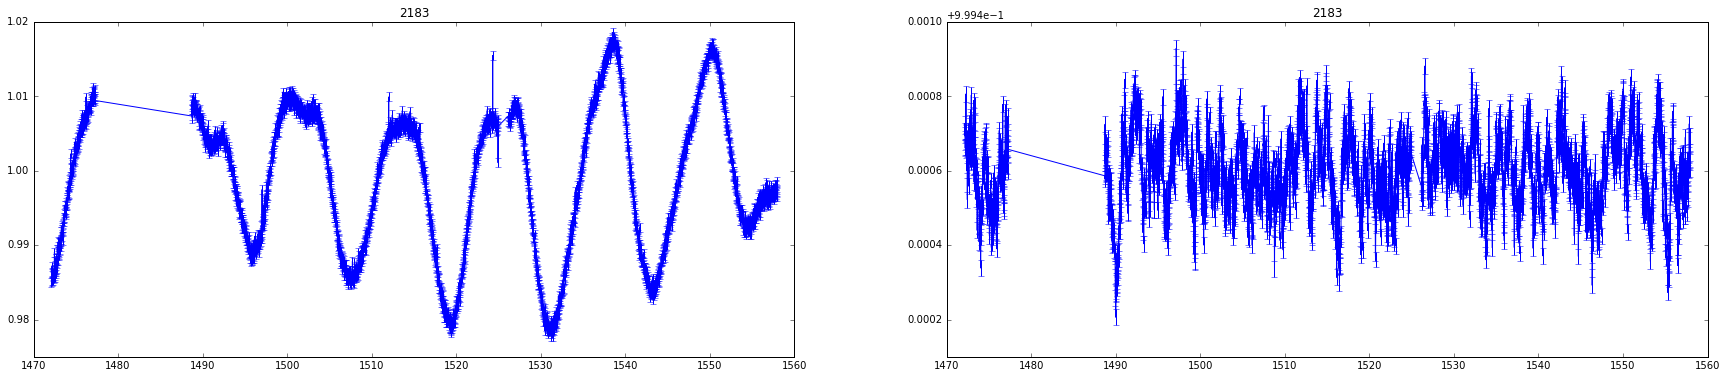

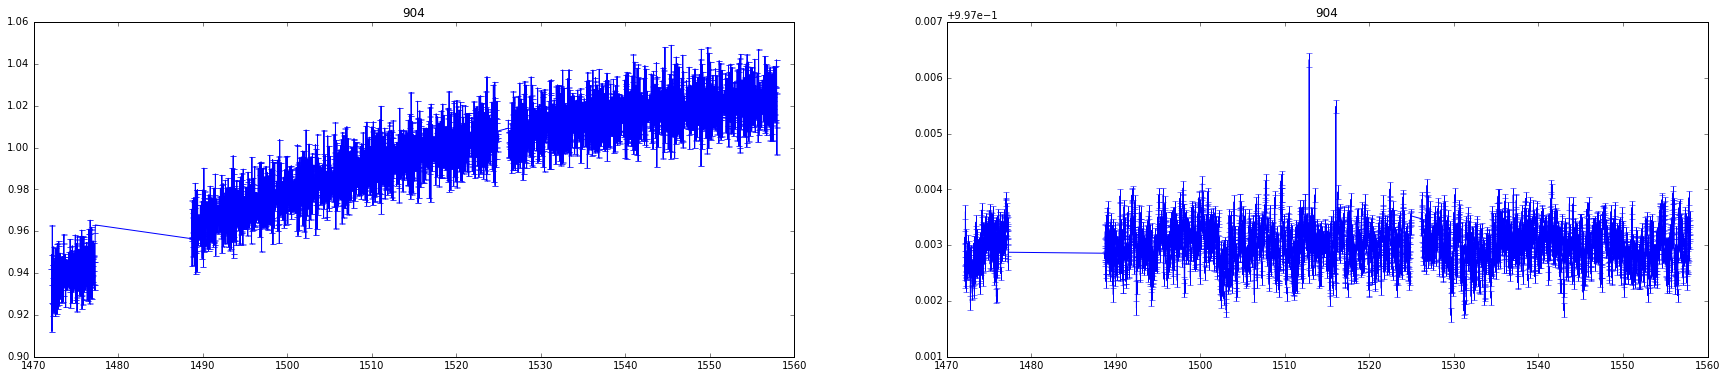

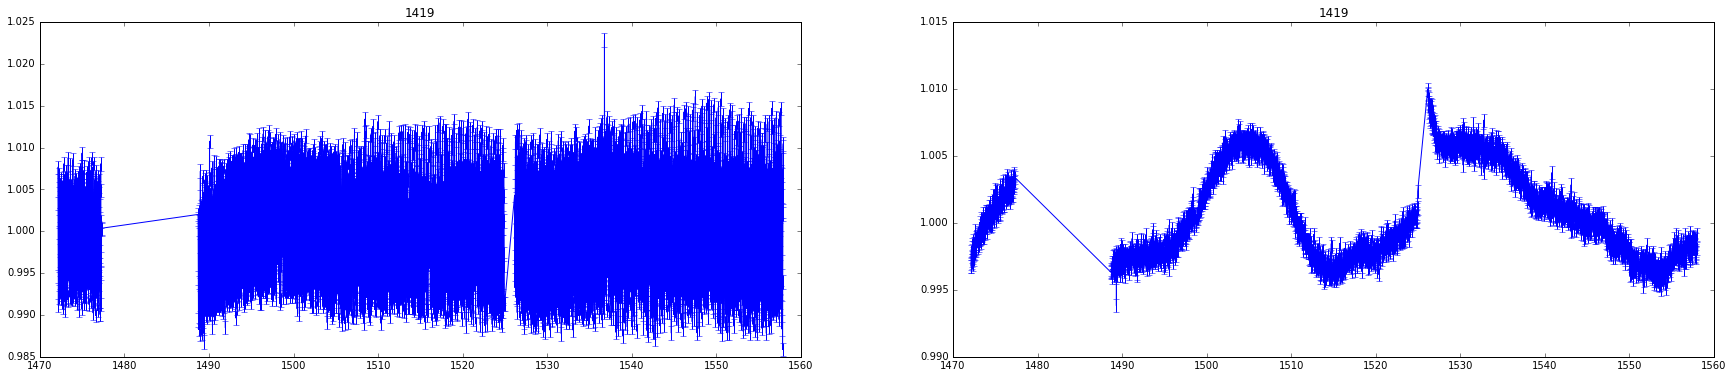

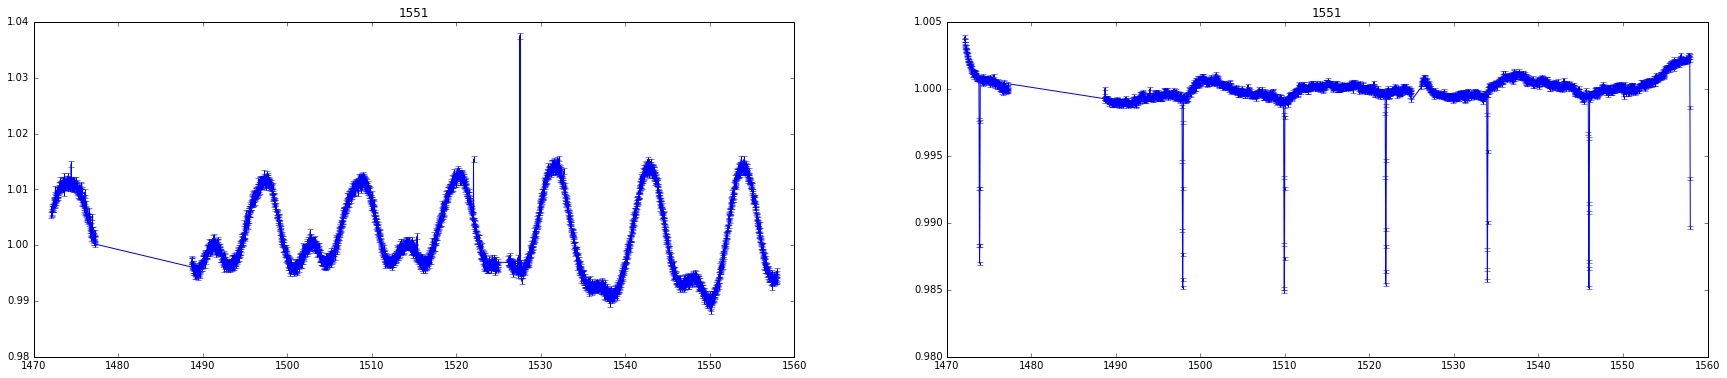

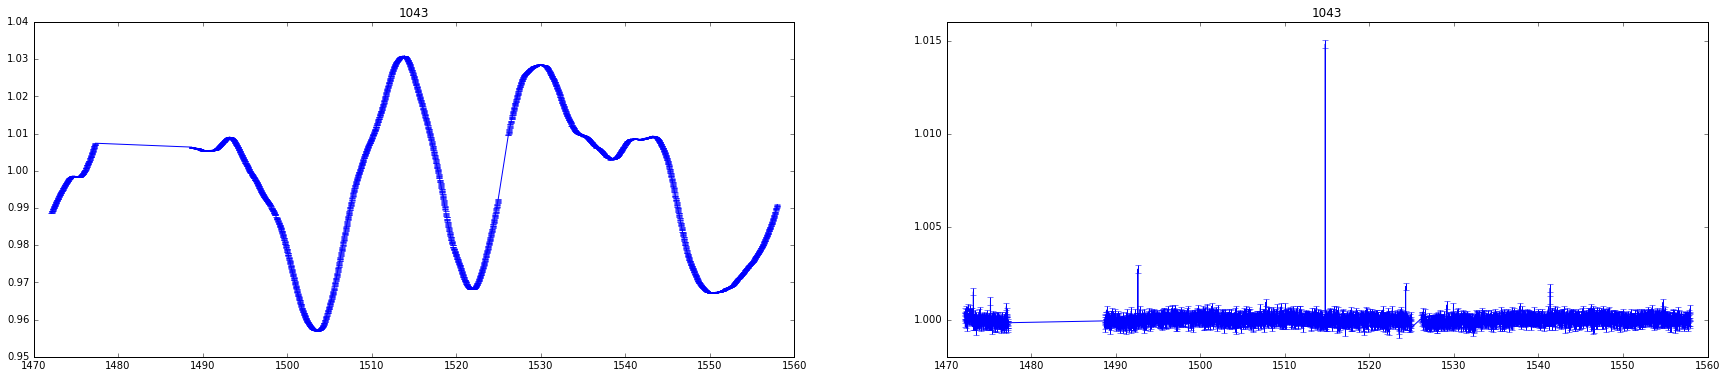

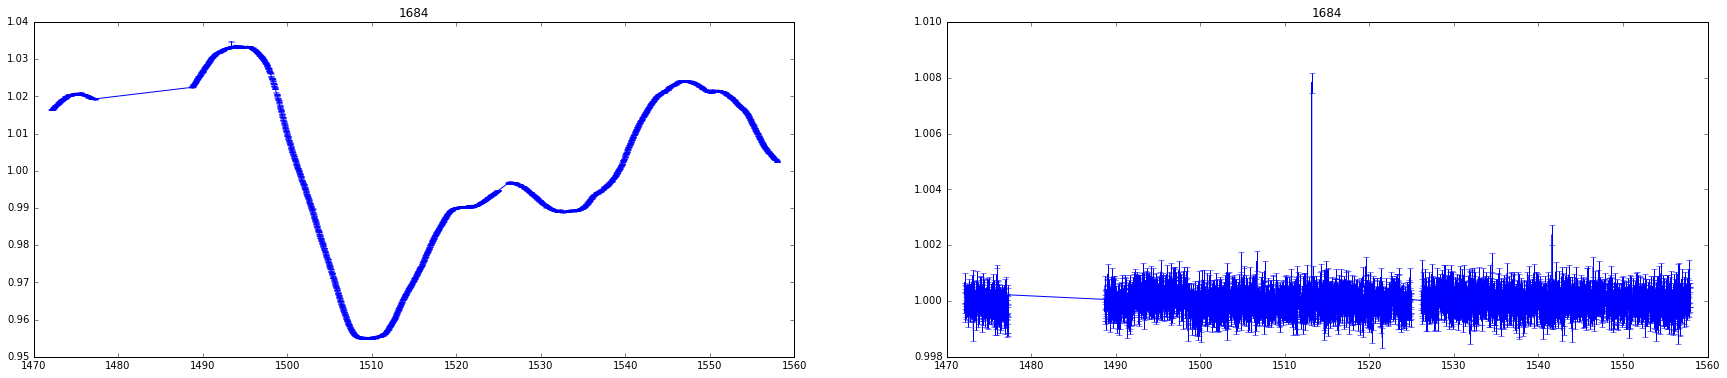

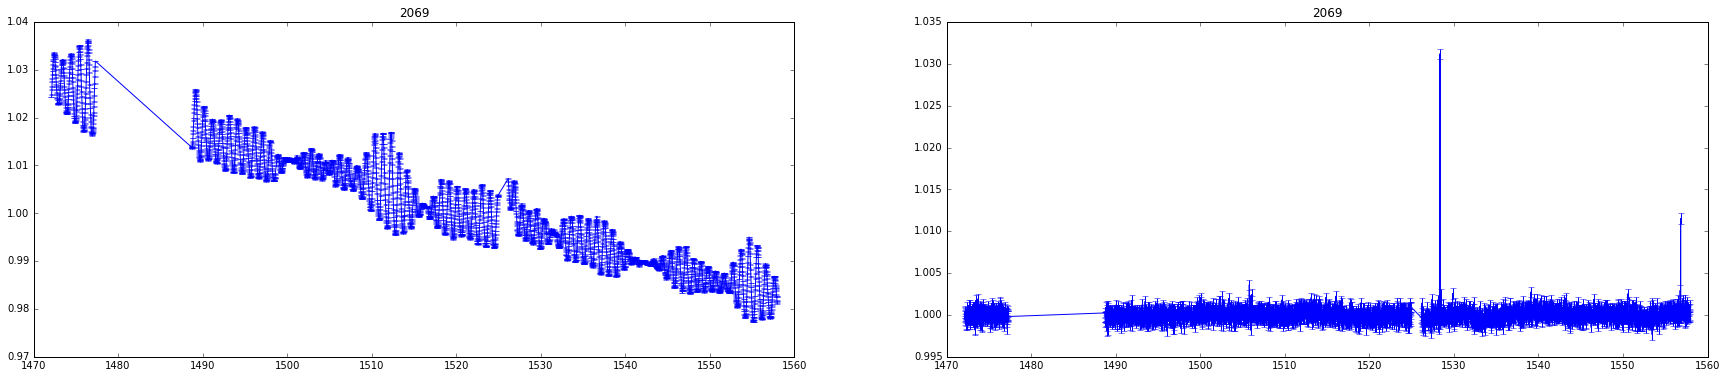

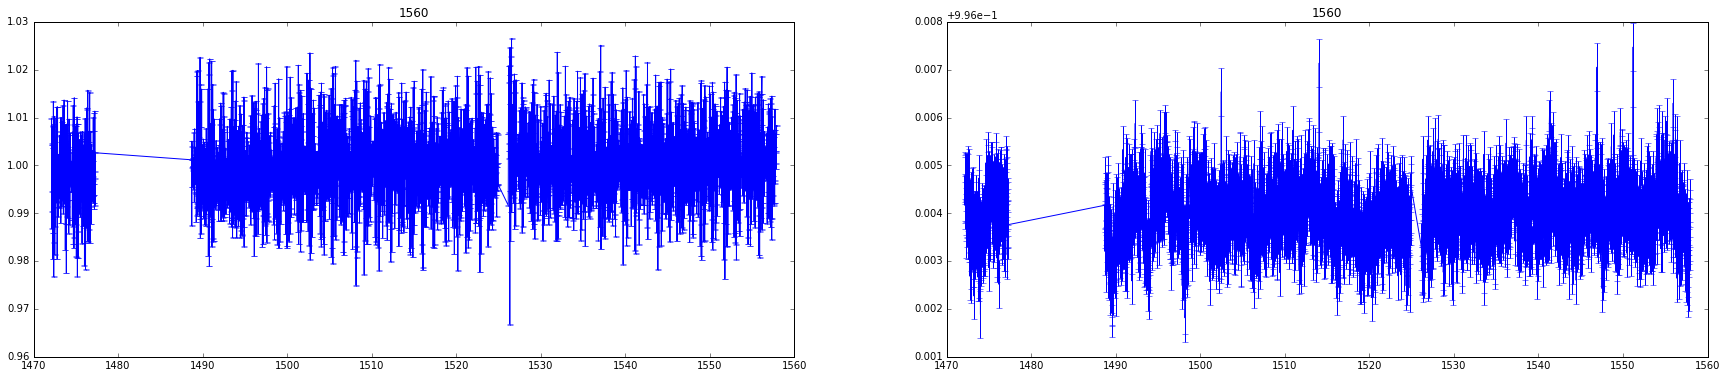

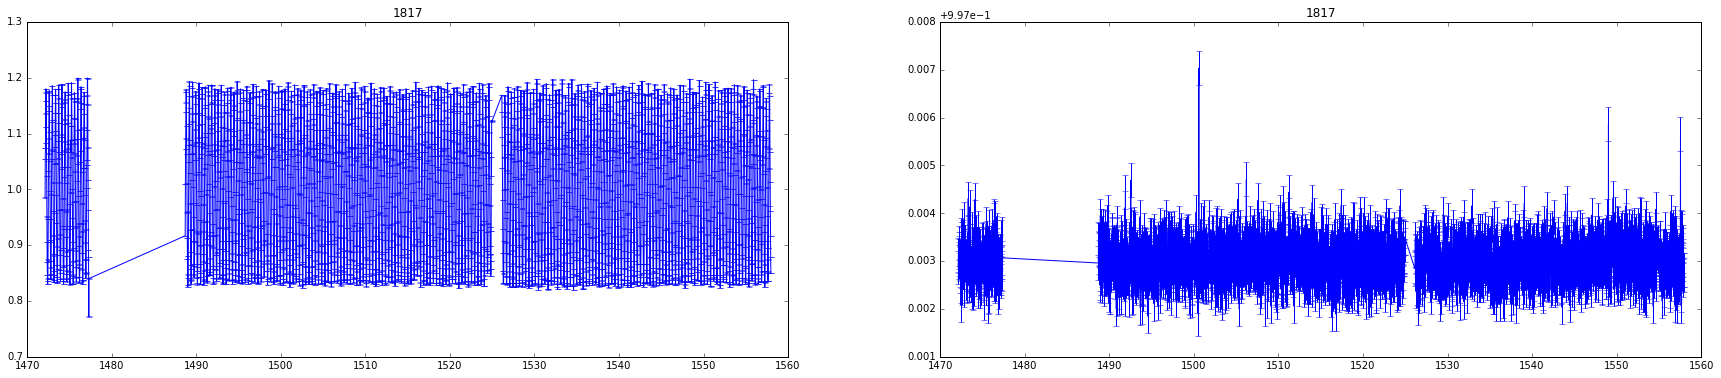

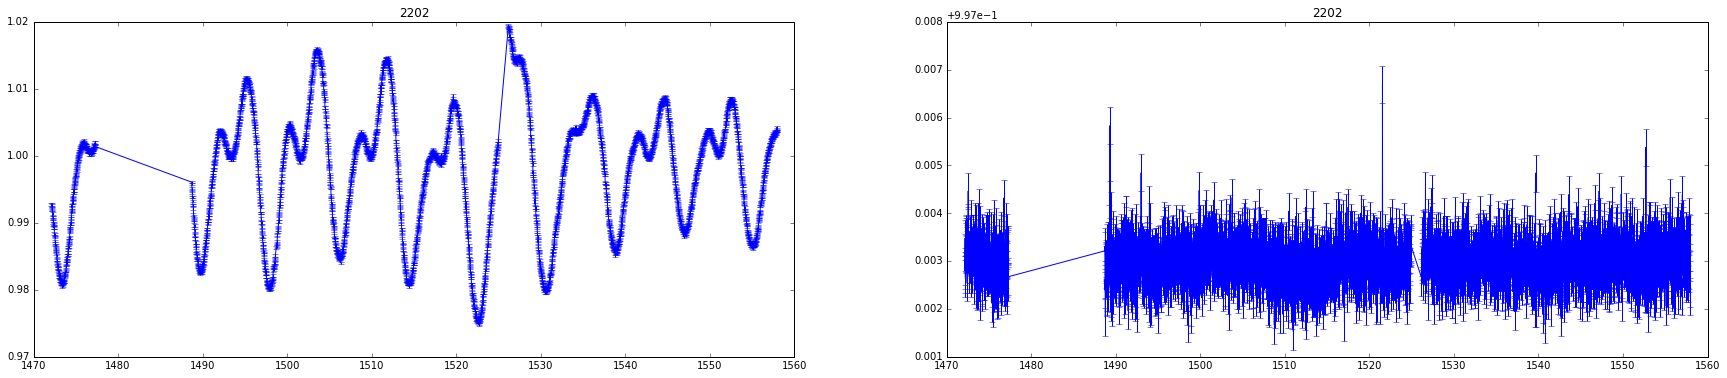

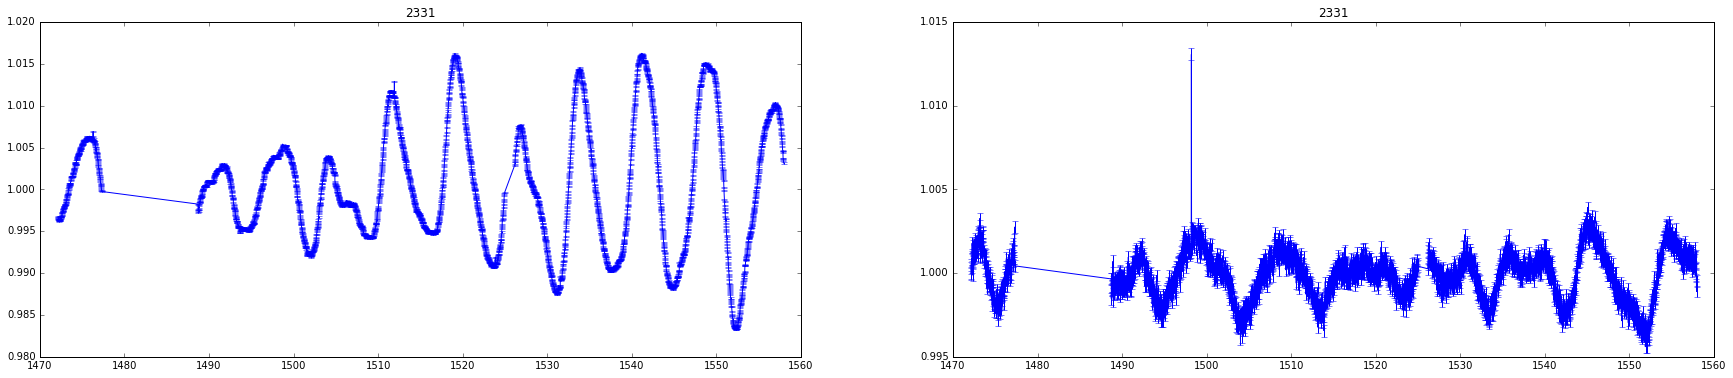

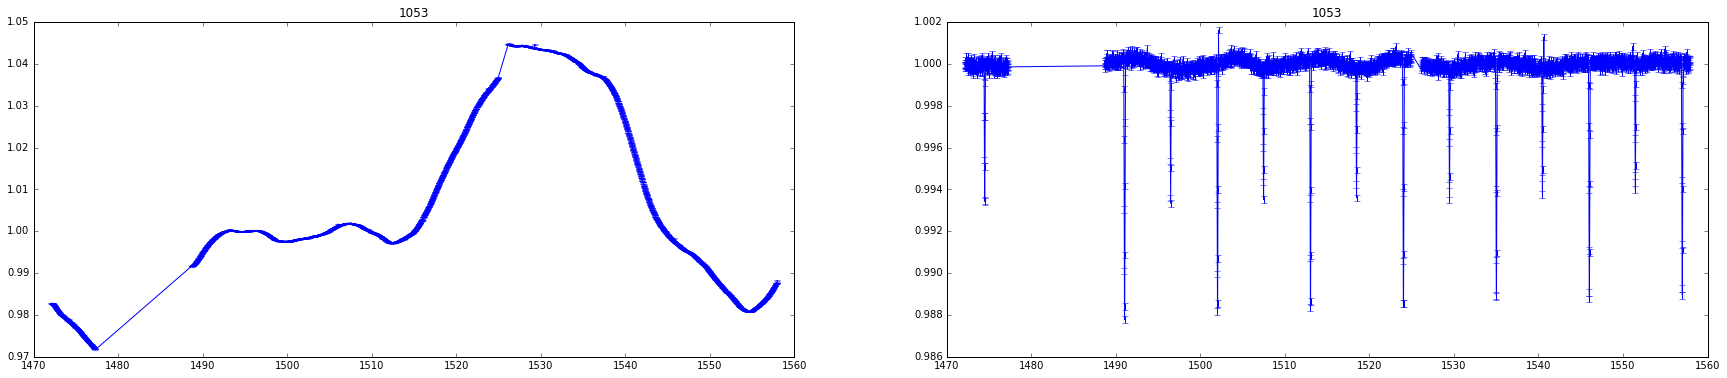

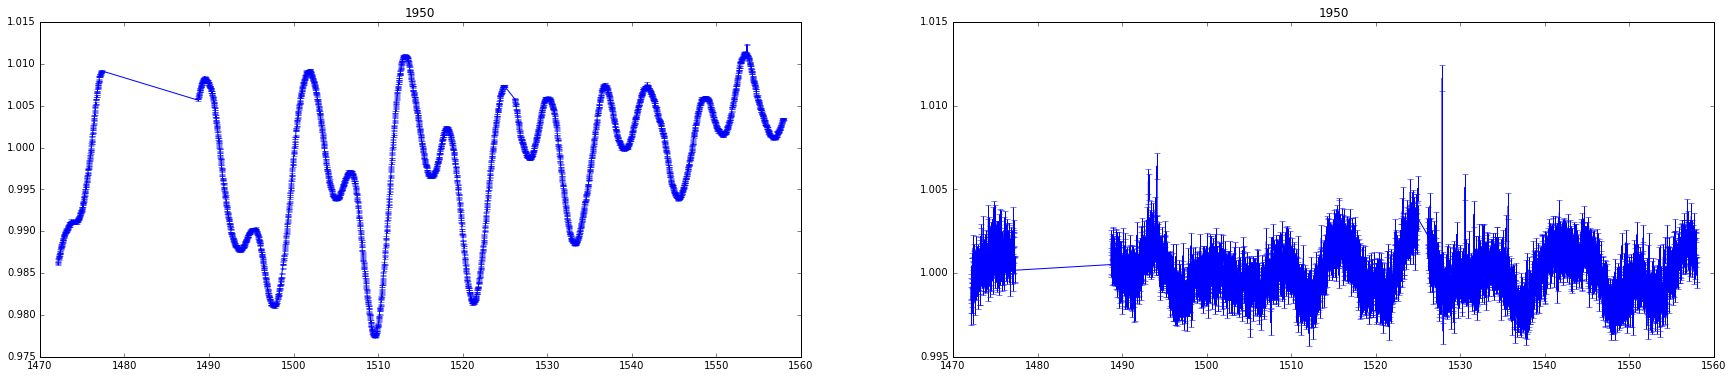

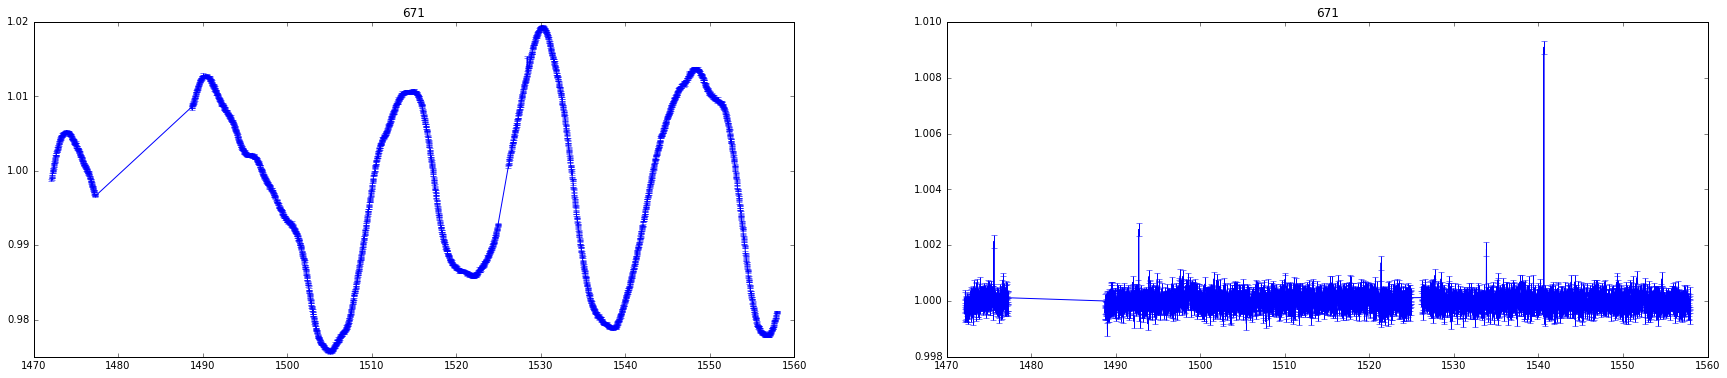

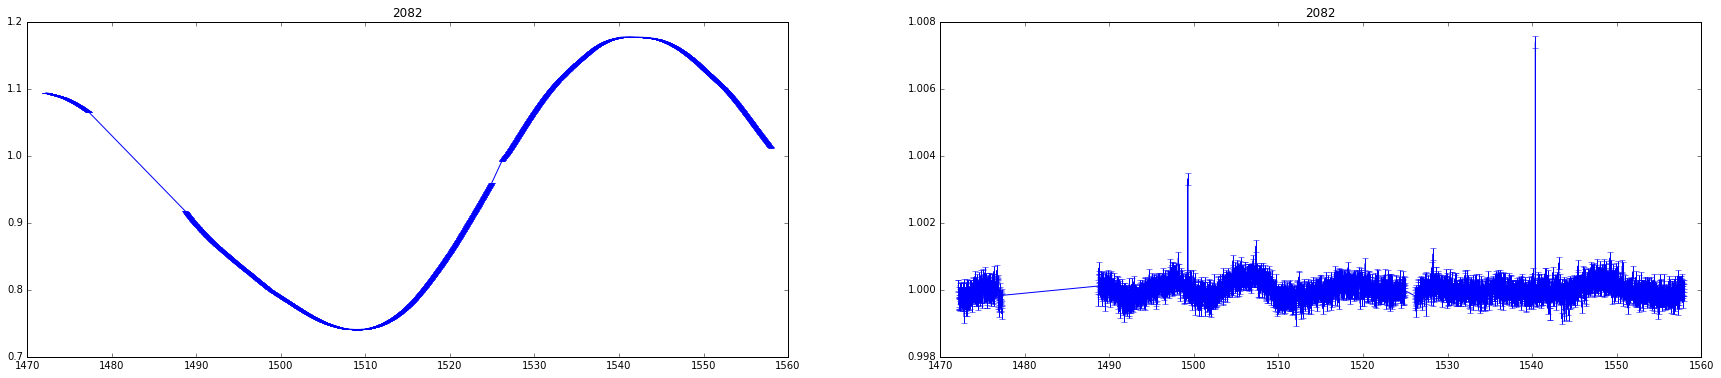

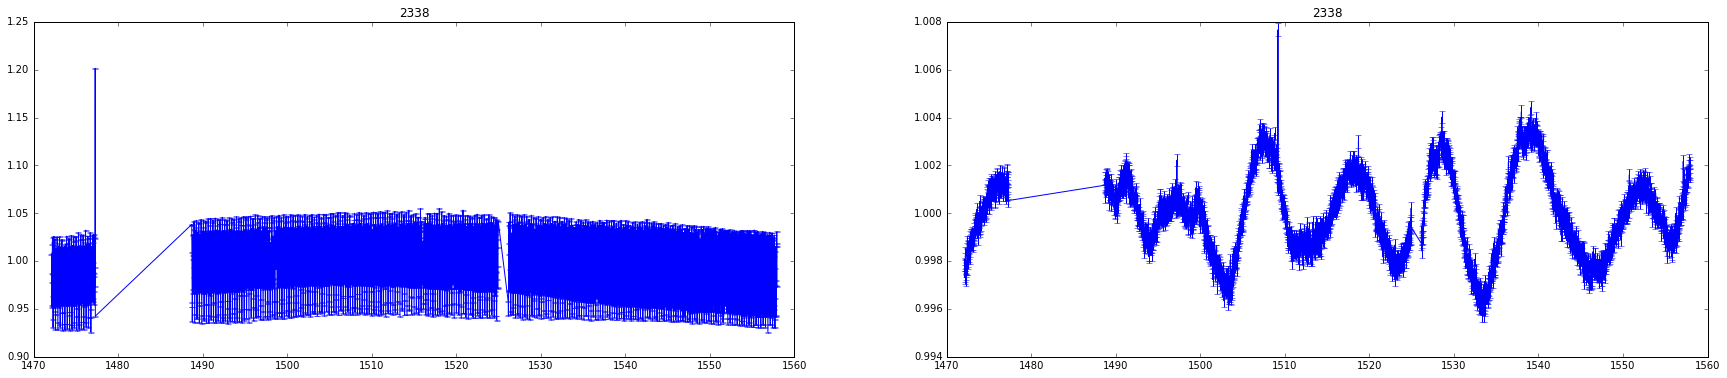

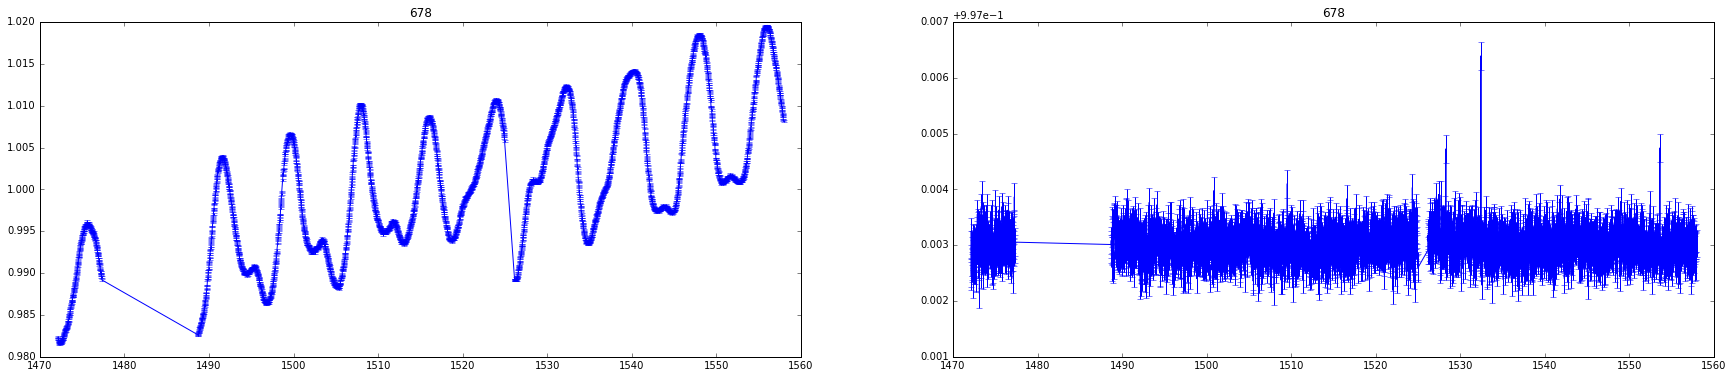

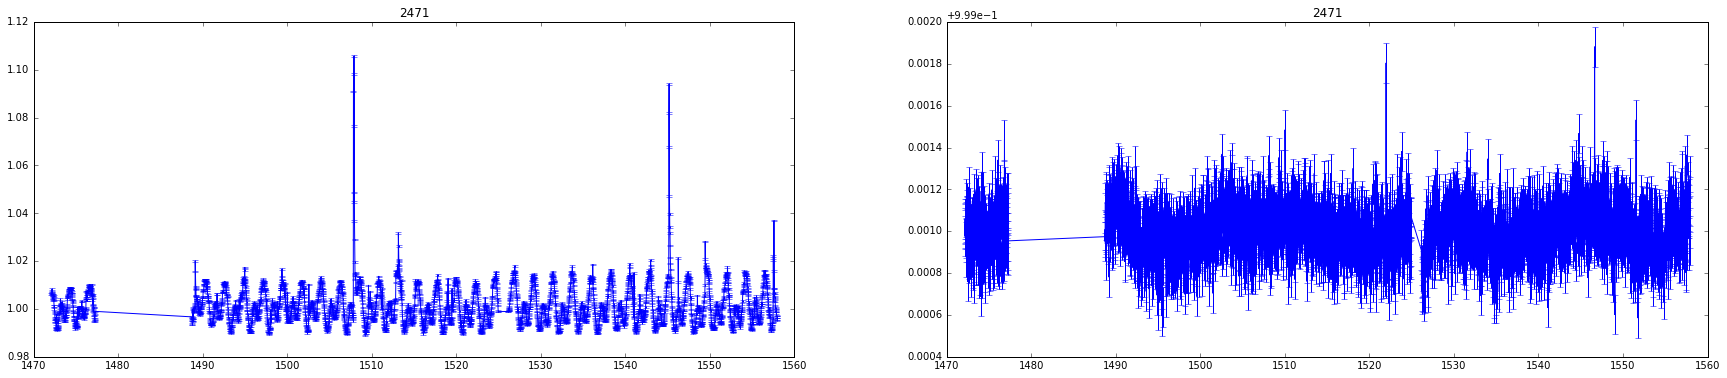

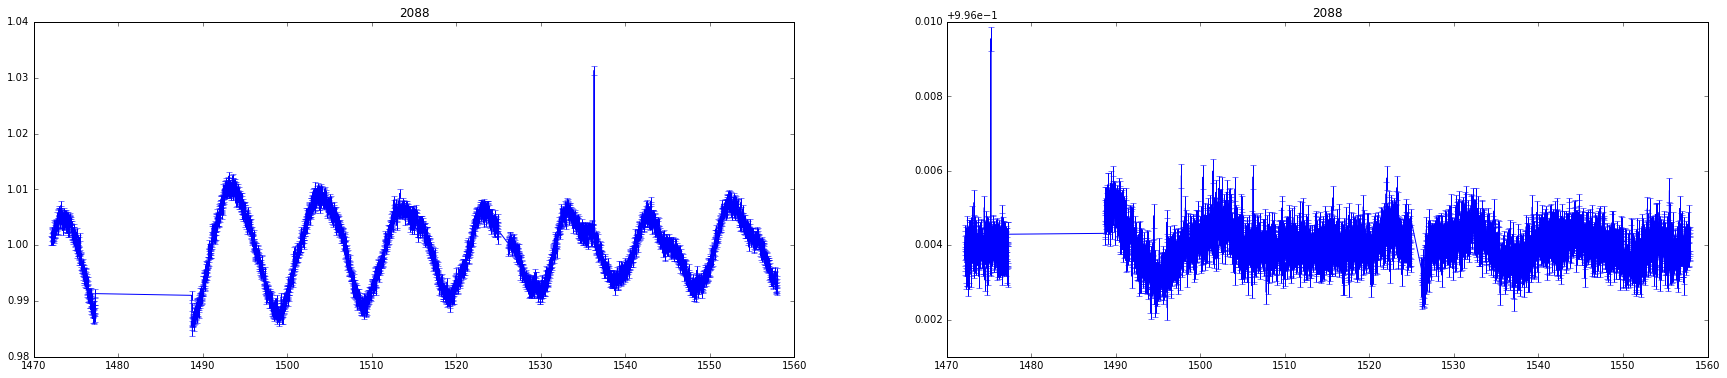

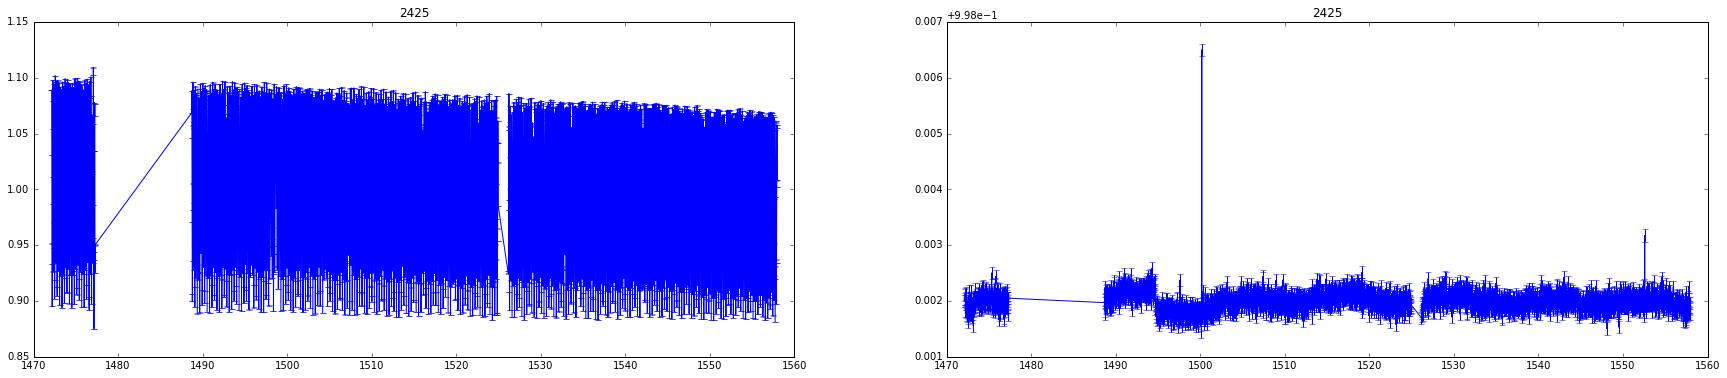

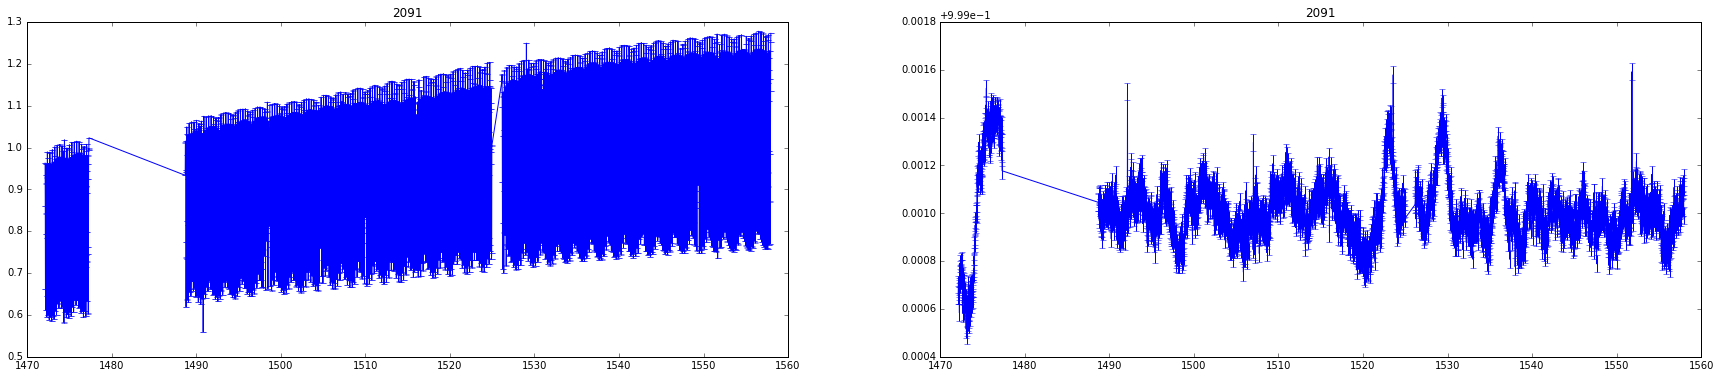

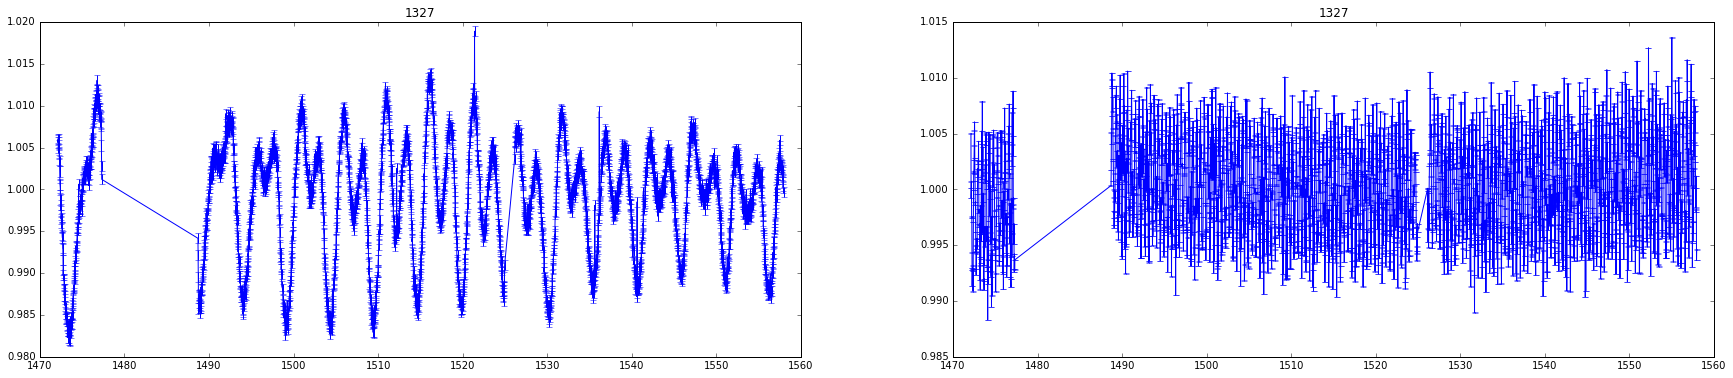

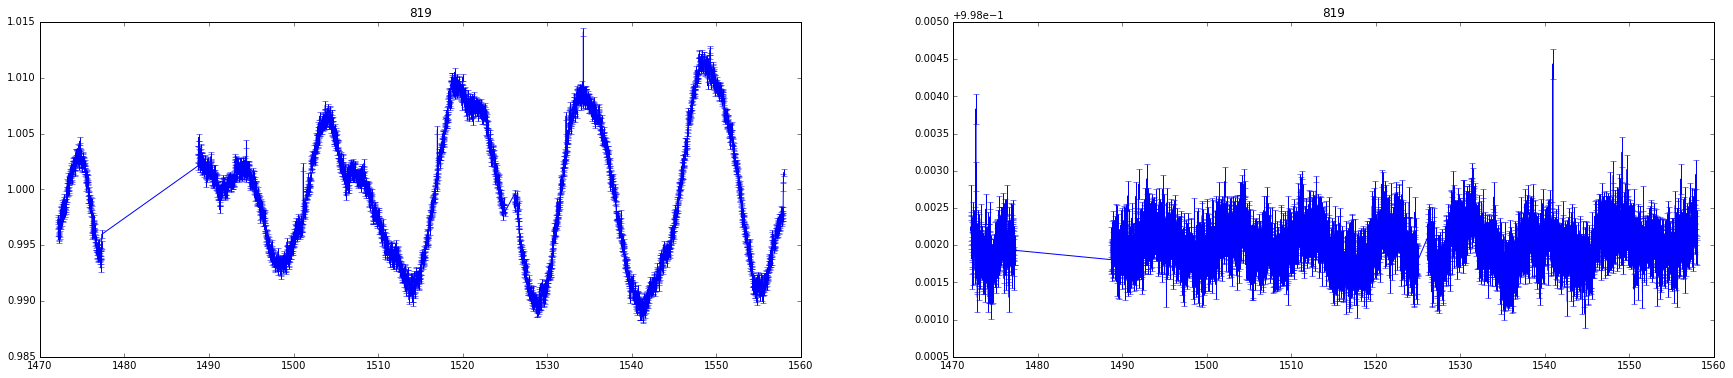

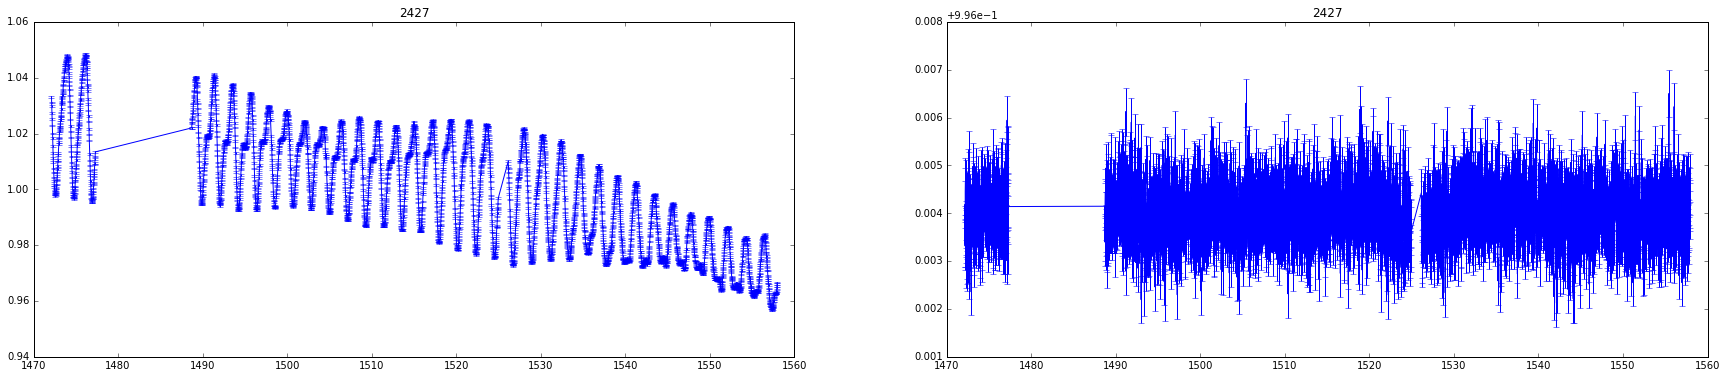

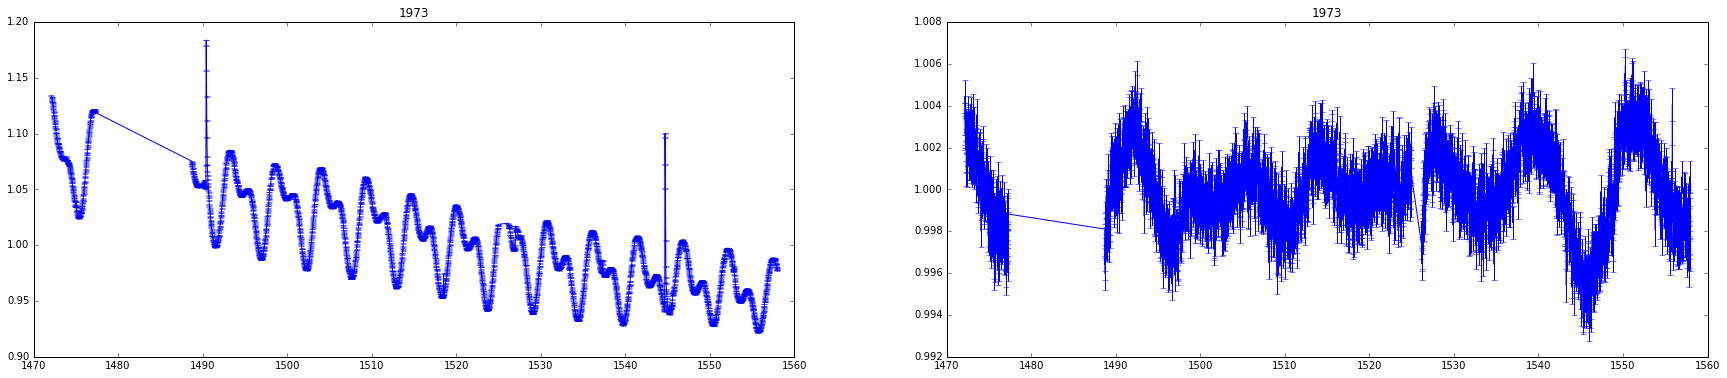

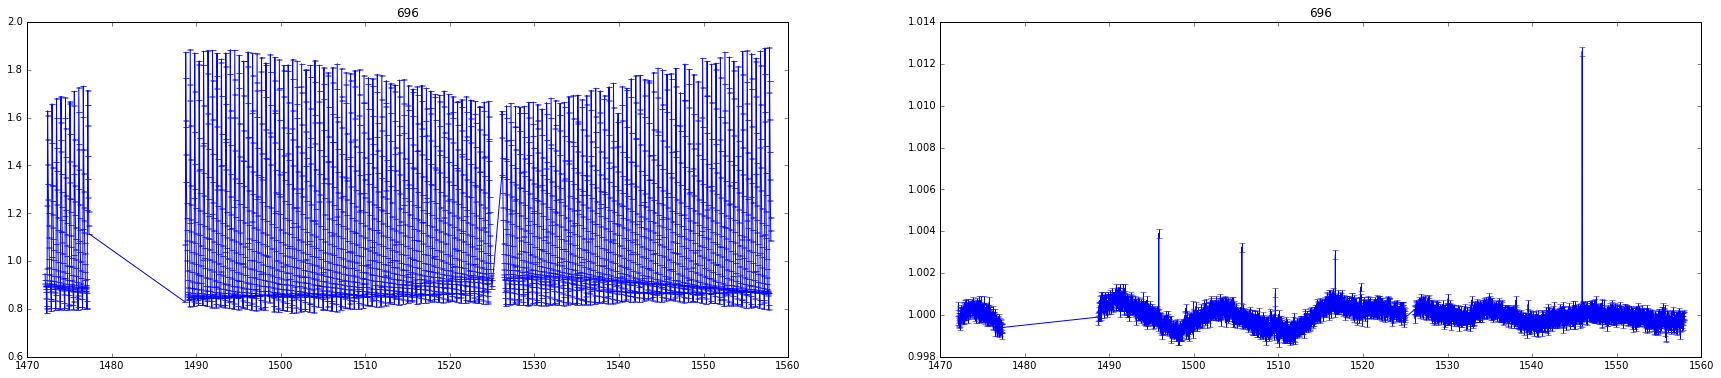

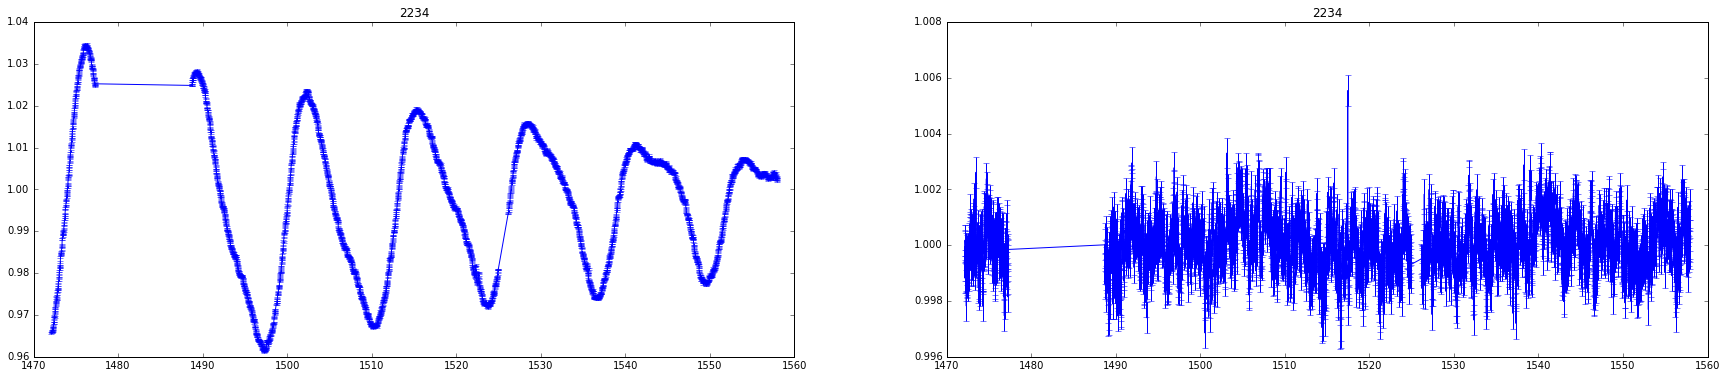

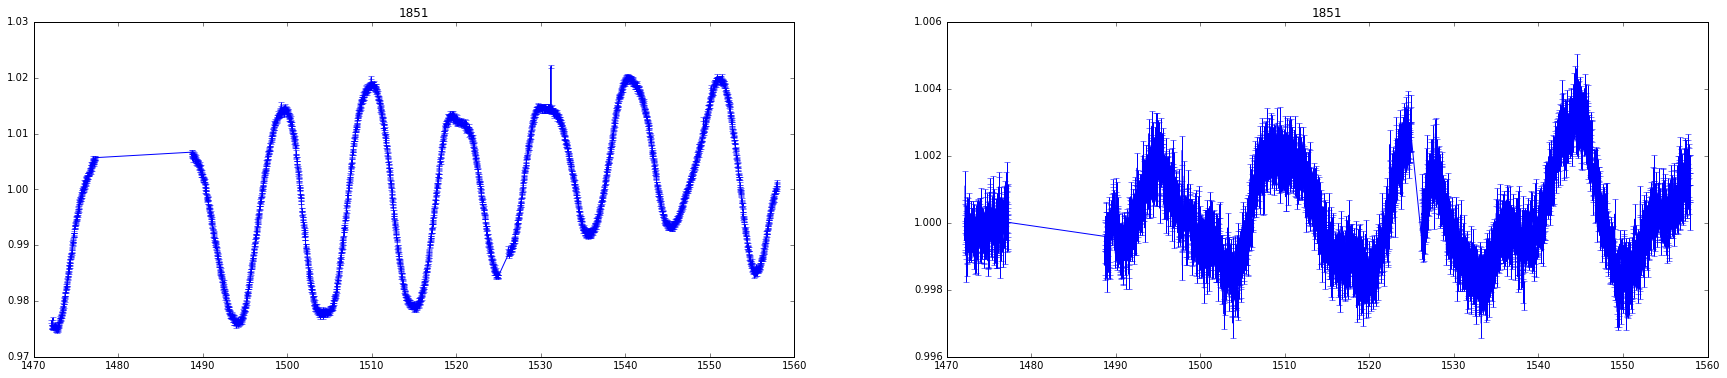

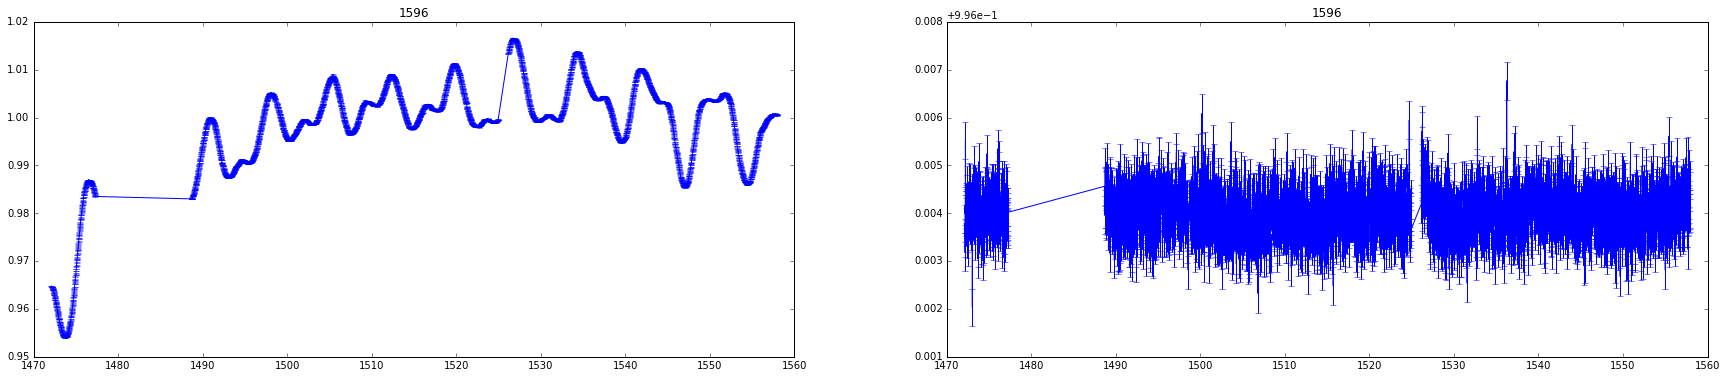

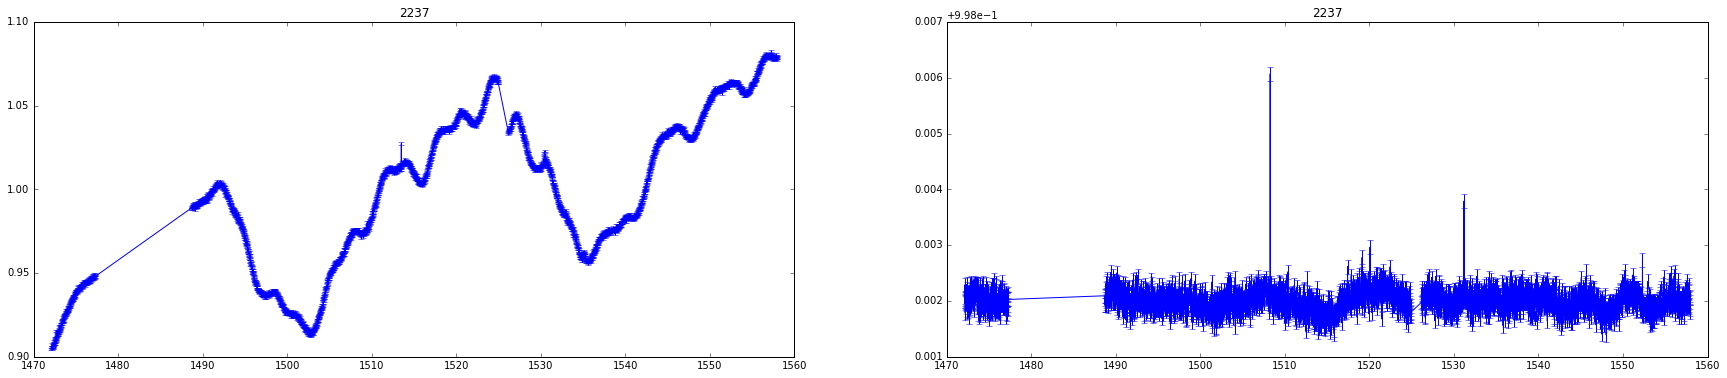

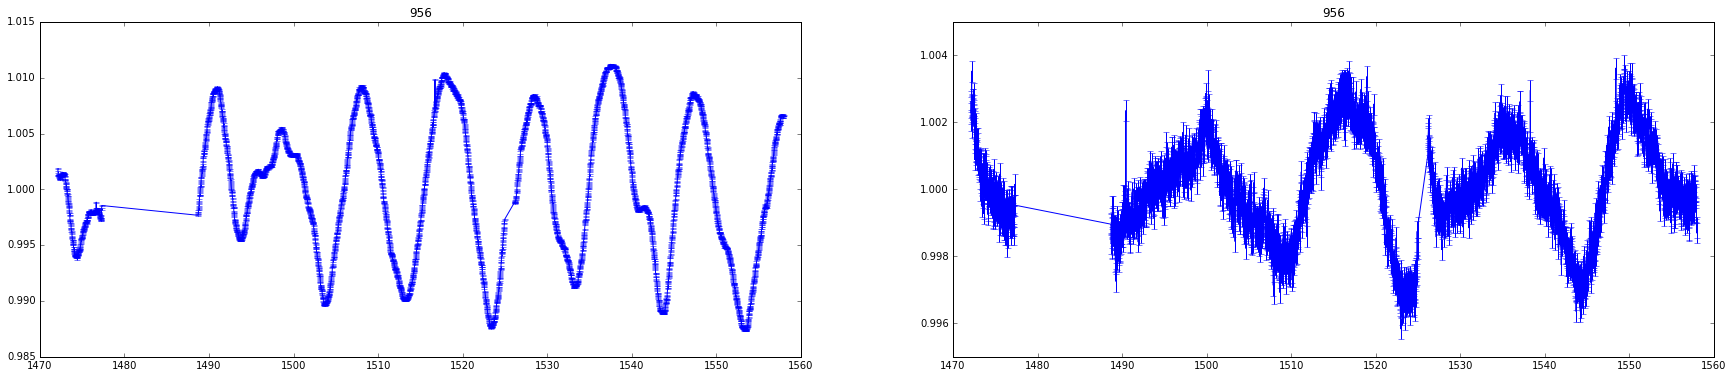

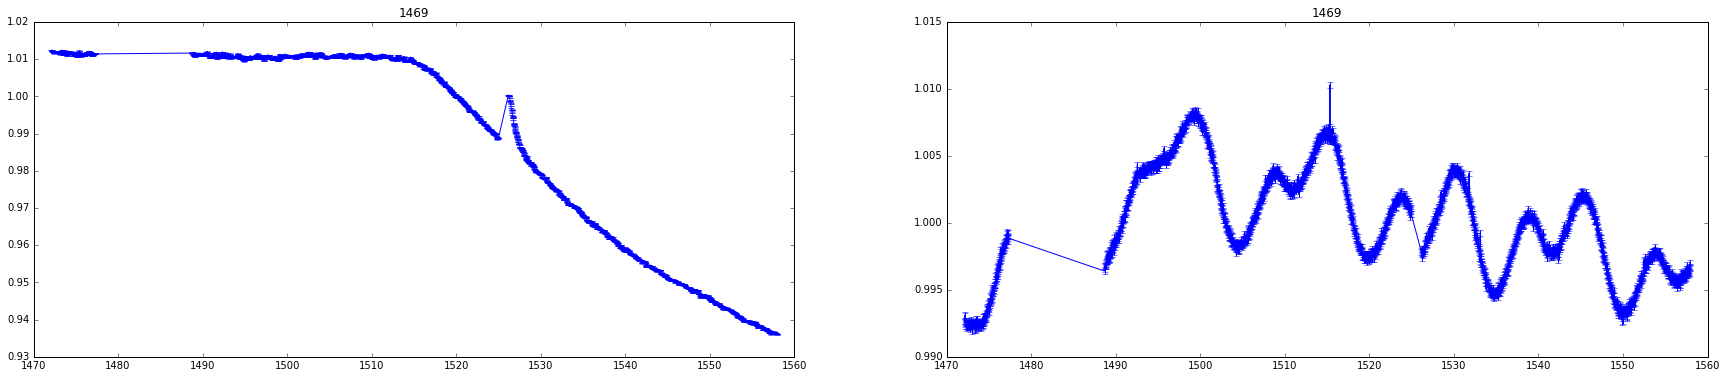

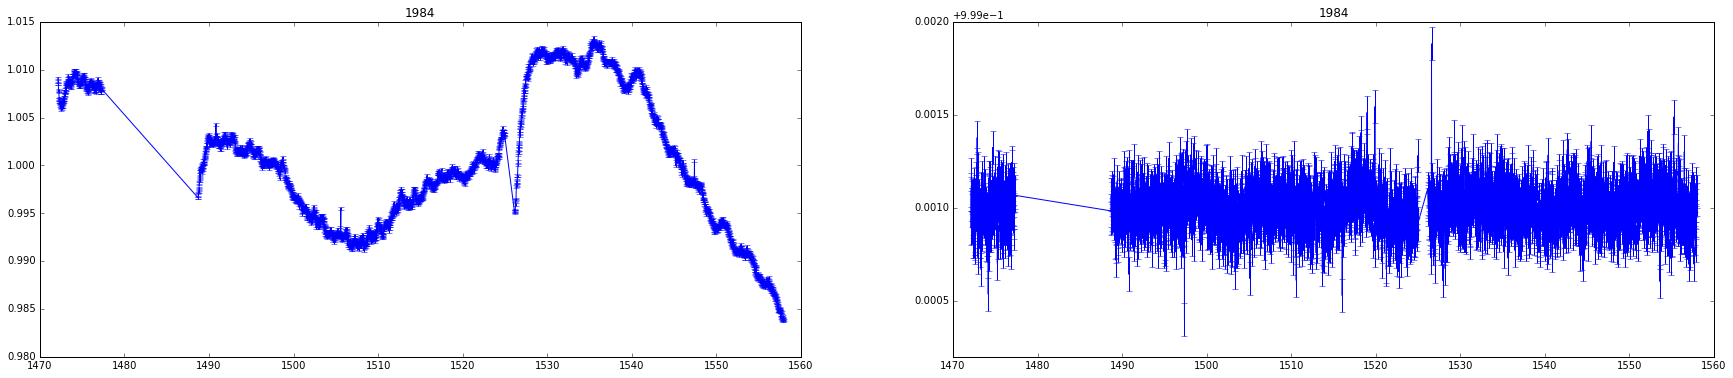

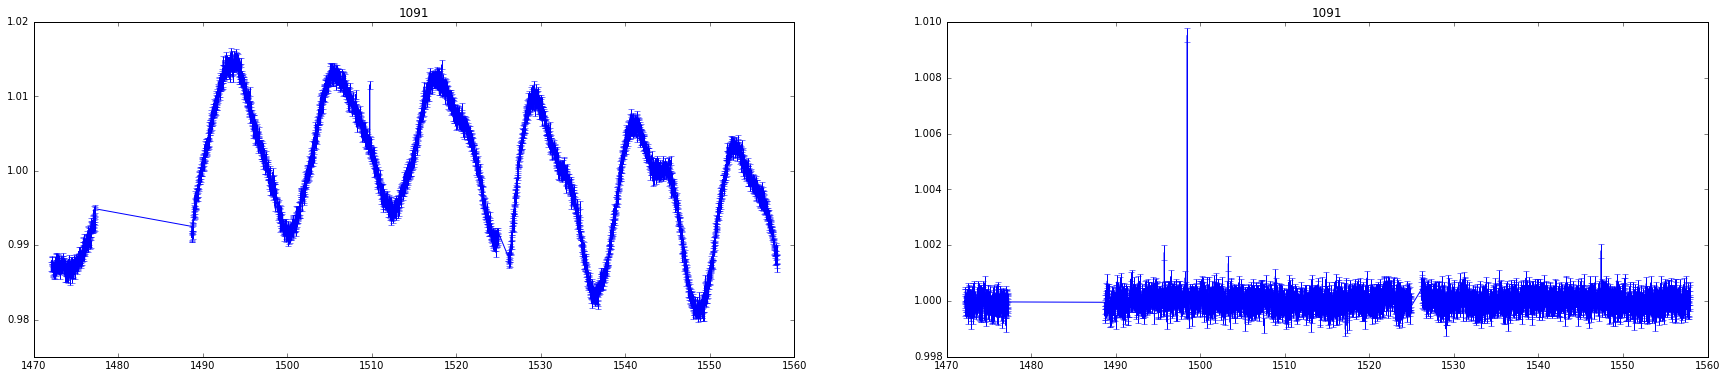

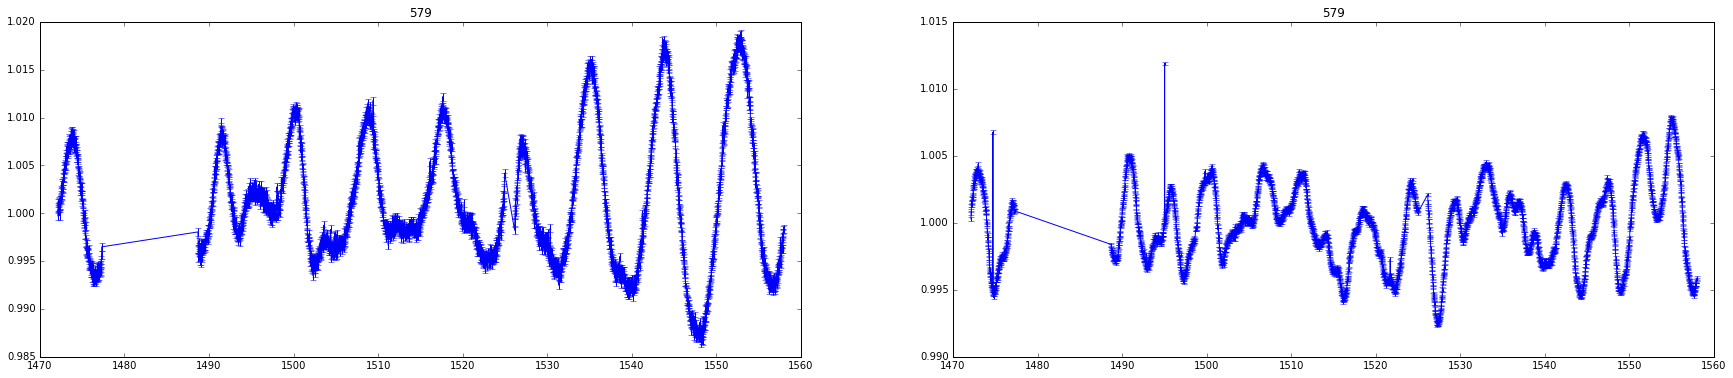

IndexError: index 2500 is out of bounds for axis 0 with size 2500

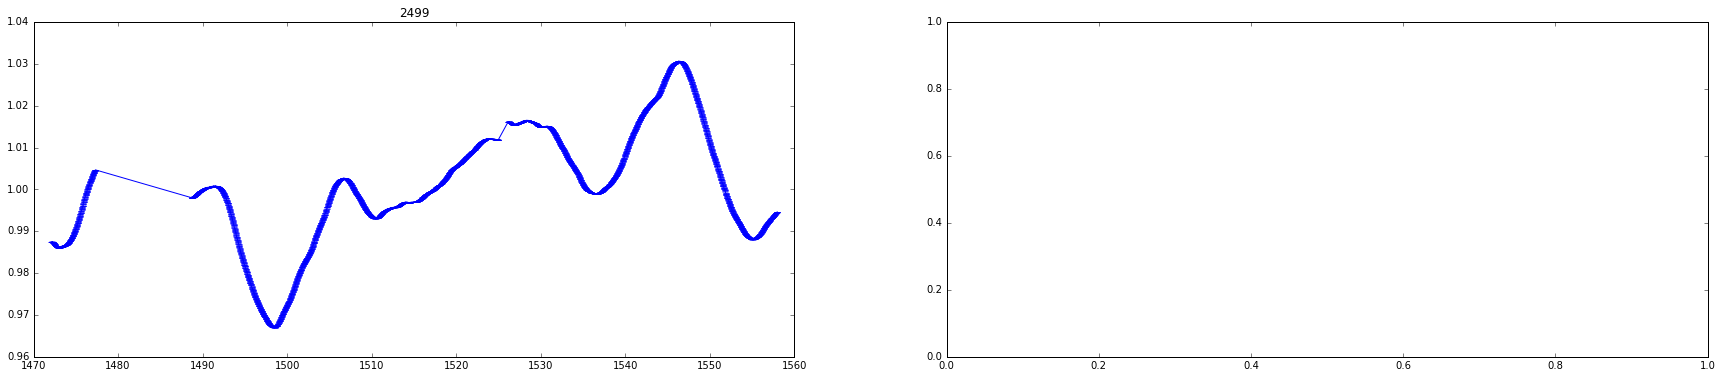

In [82]:
for i,ex in enumerate(new_set):
    f, (ax0, ax1) = plt.subplots(1, 2, figsize=(30, 6))
    ax0.errorbar(time[ex], flux[ex], unc[ex])
    ax0.set_title(ex)
    ax1.errorbar(time[ex+1], flux[ex+1], unc[ex+1])
    ax1.set_title(ex)
    plt.show()

In [83]:
normal_idxs = np.argsort(-scores)[:100] + 500
#print(scoresDense[normal_idxs])

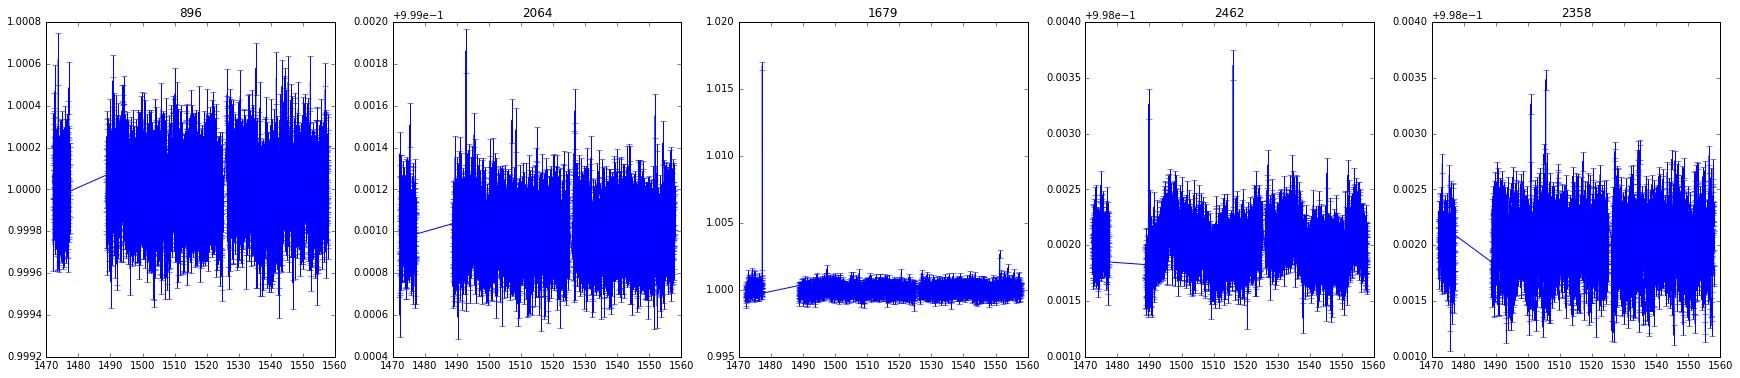

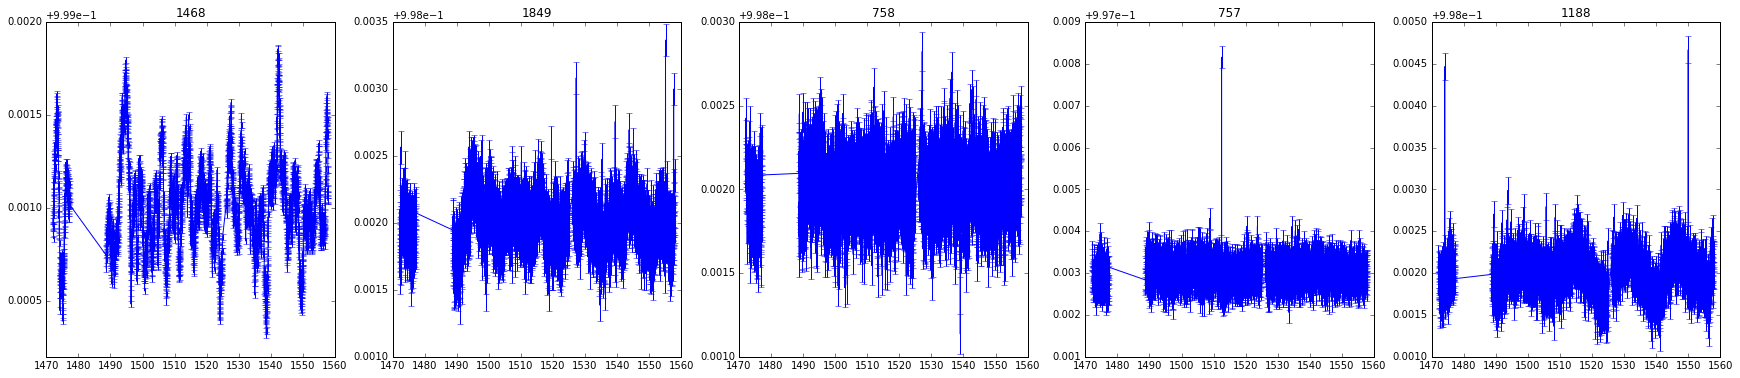

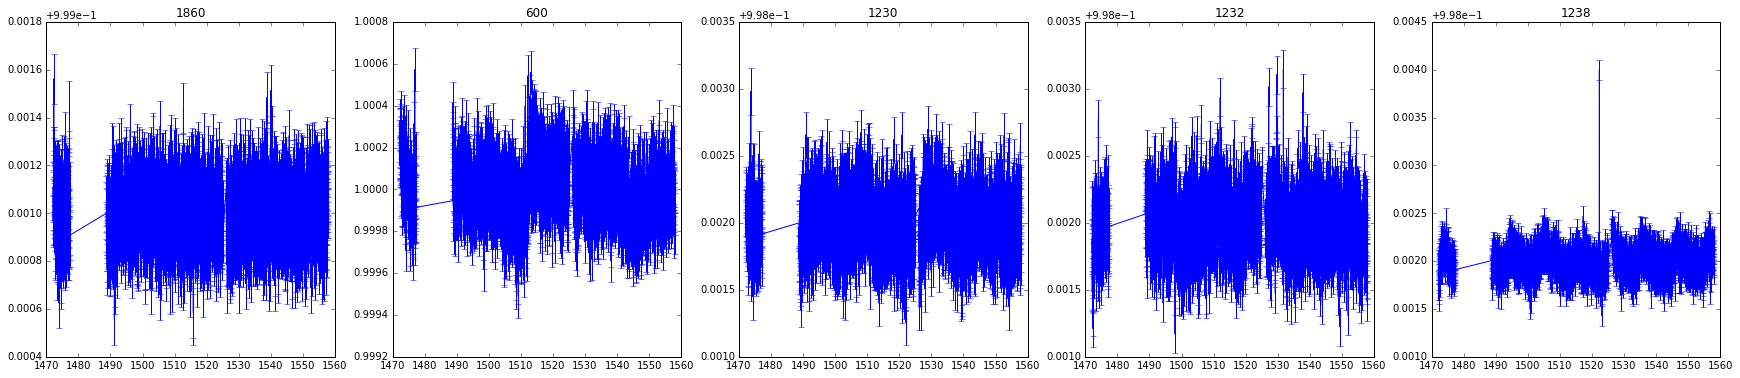

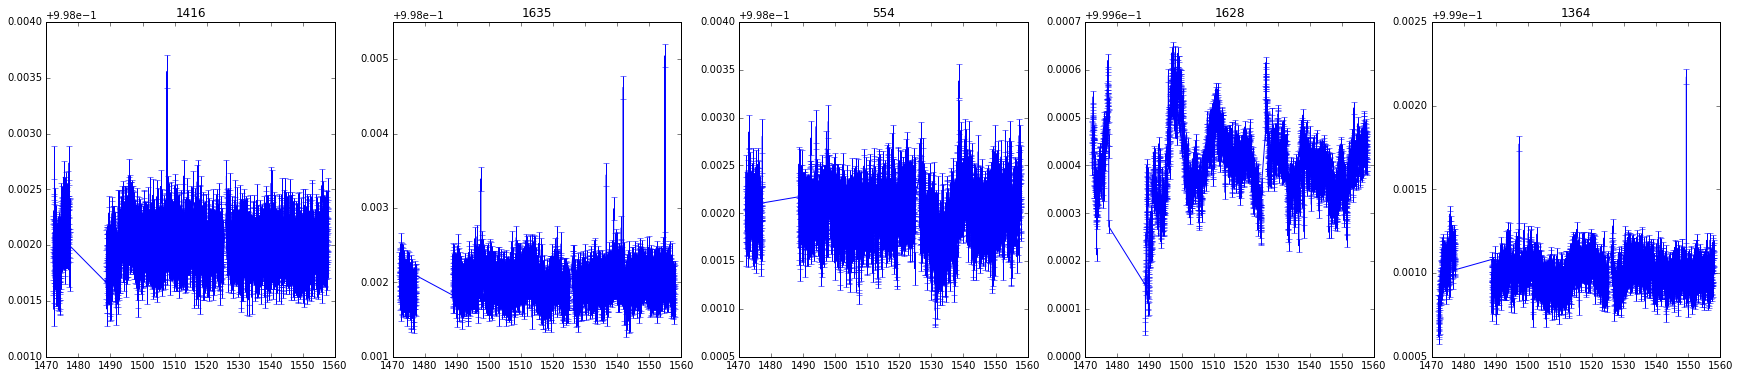

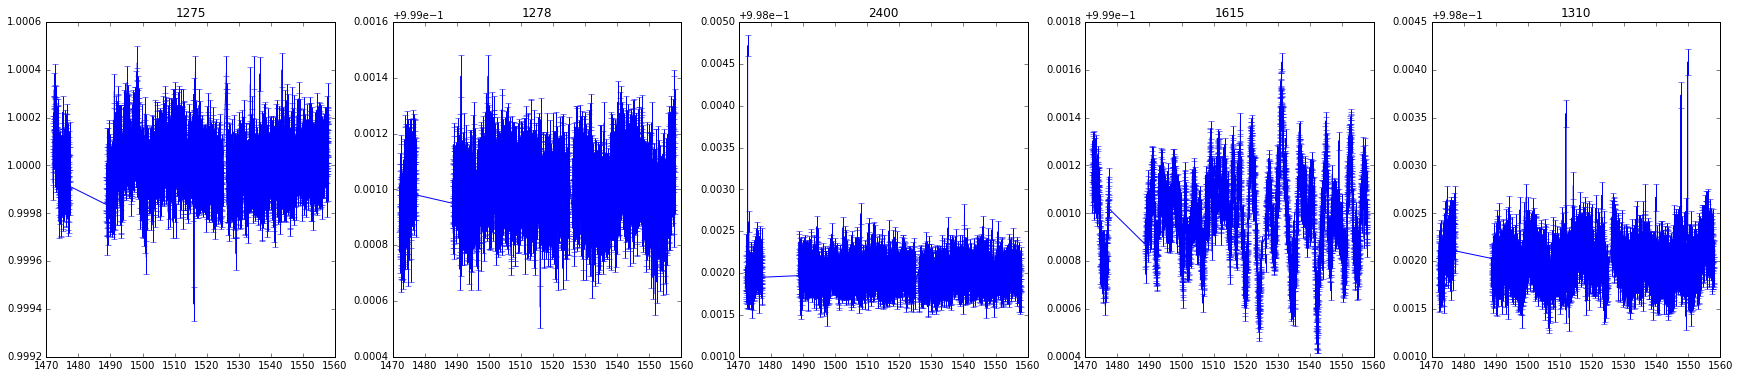

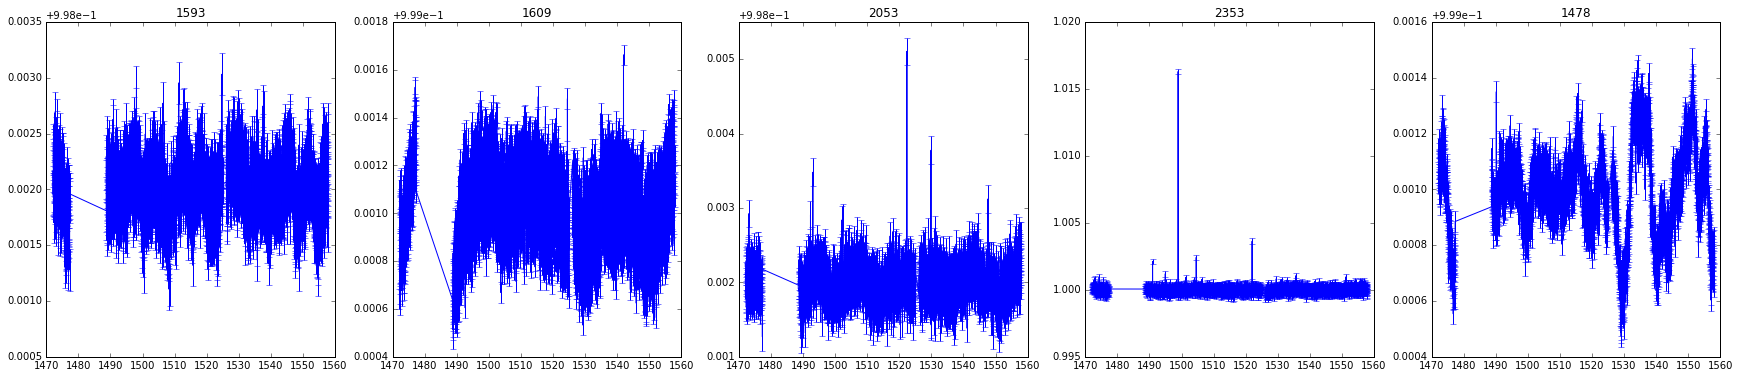

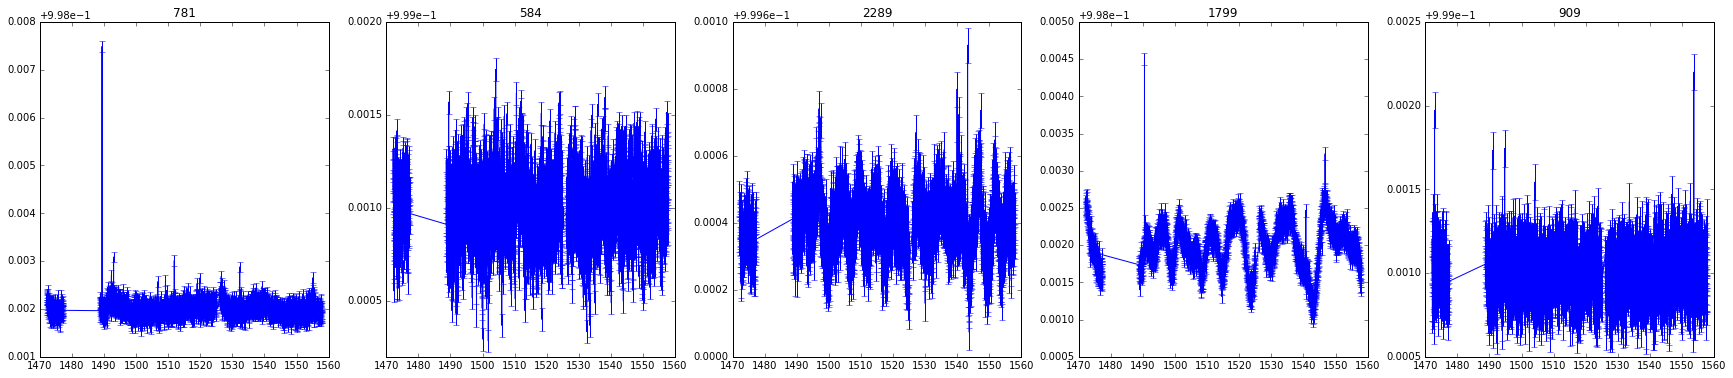

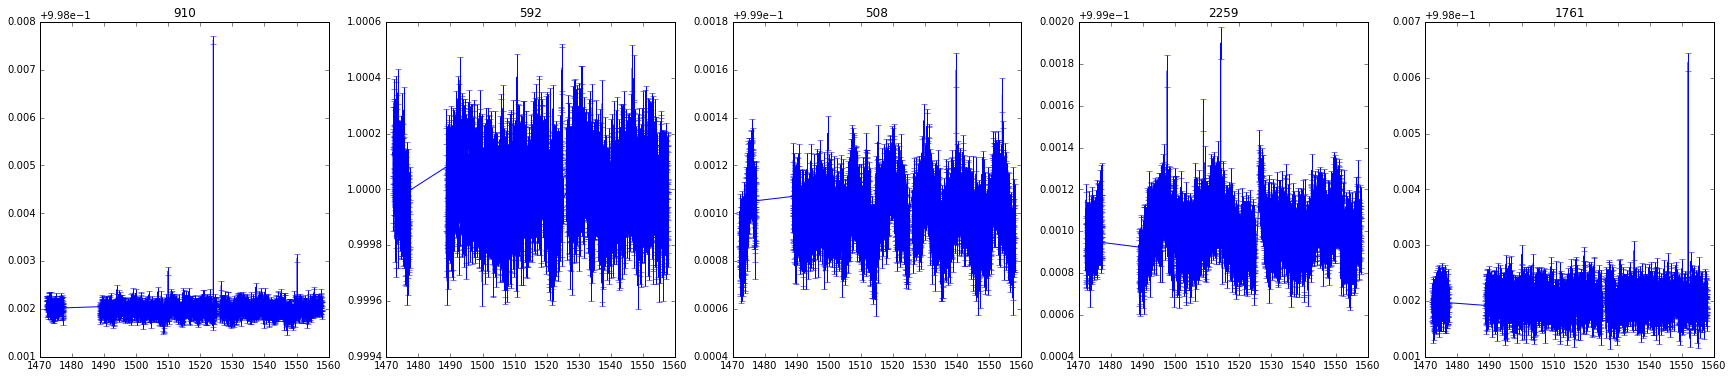

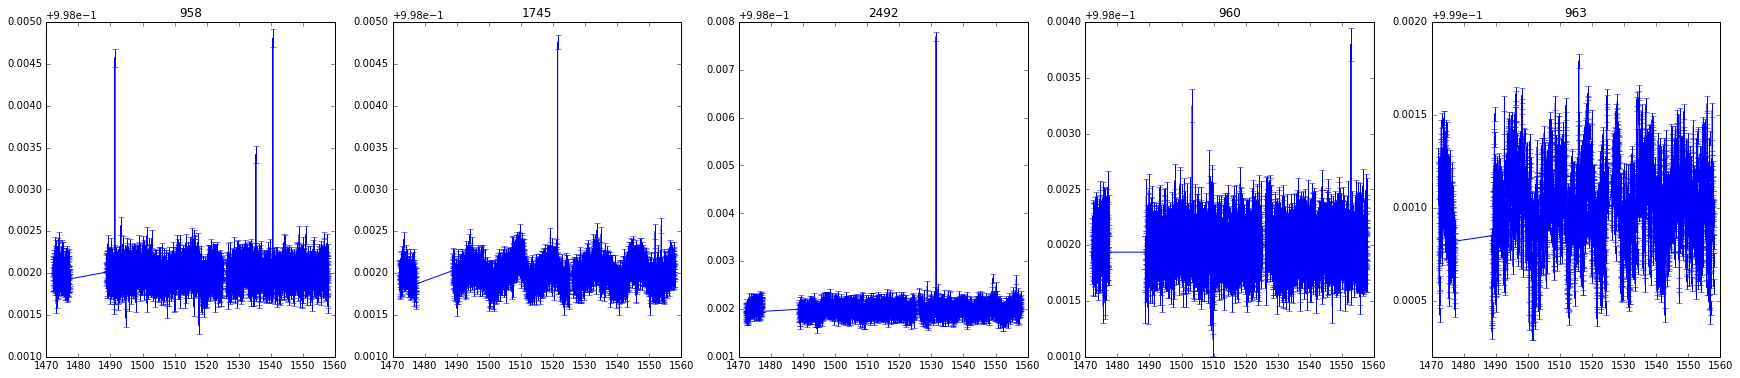

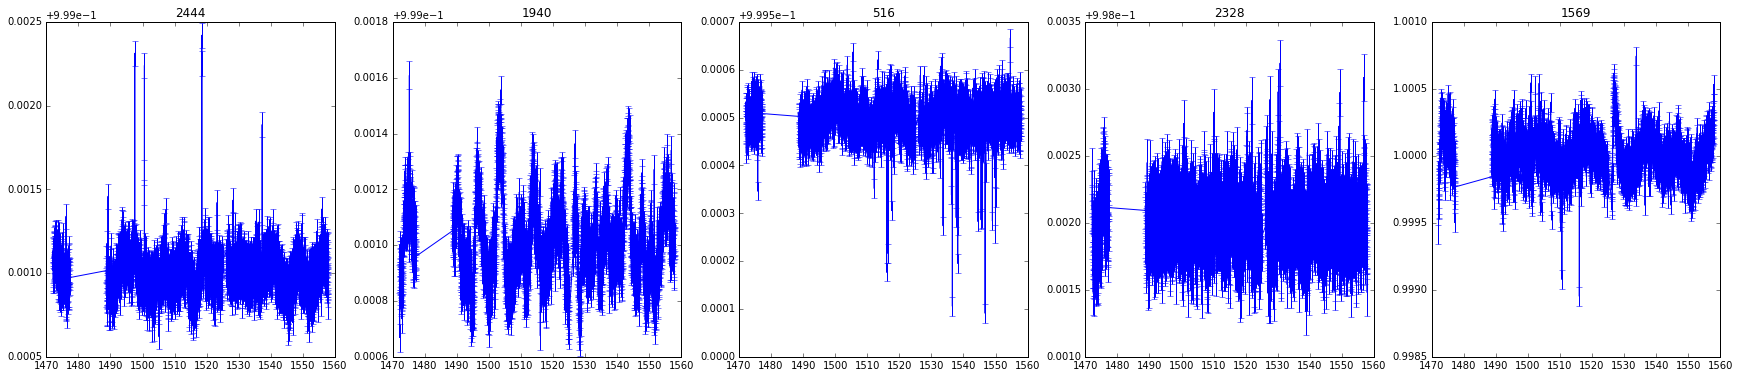

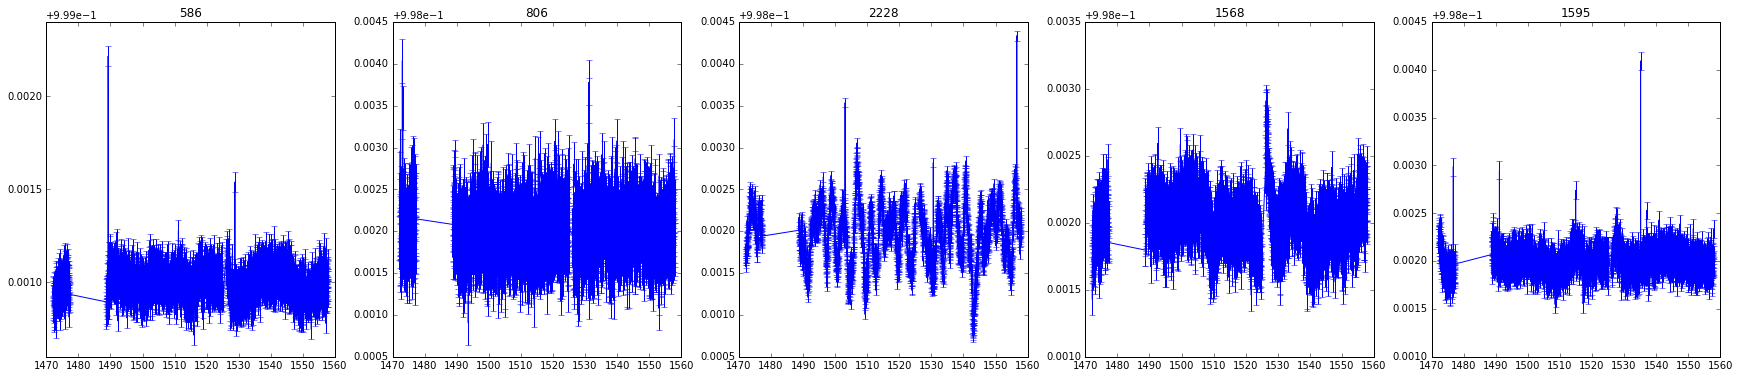

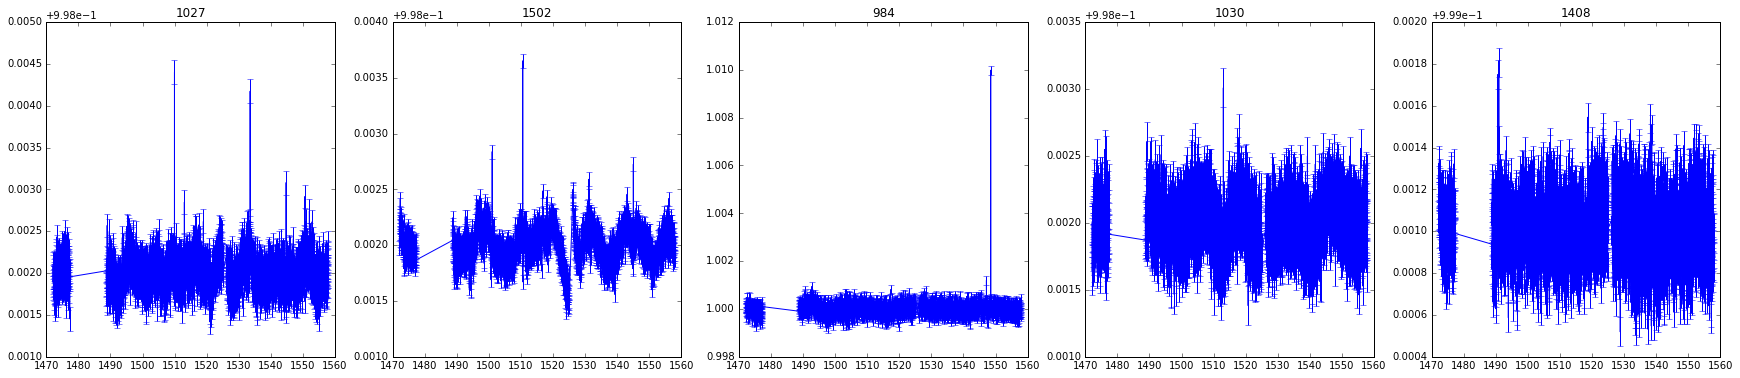

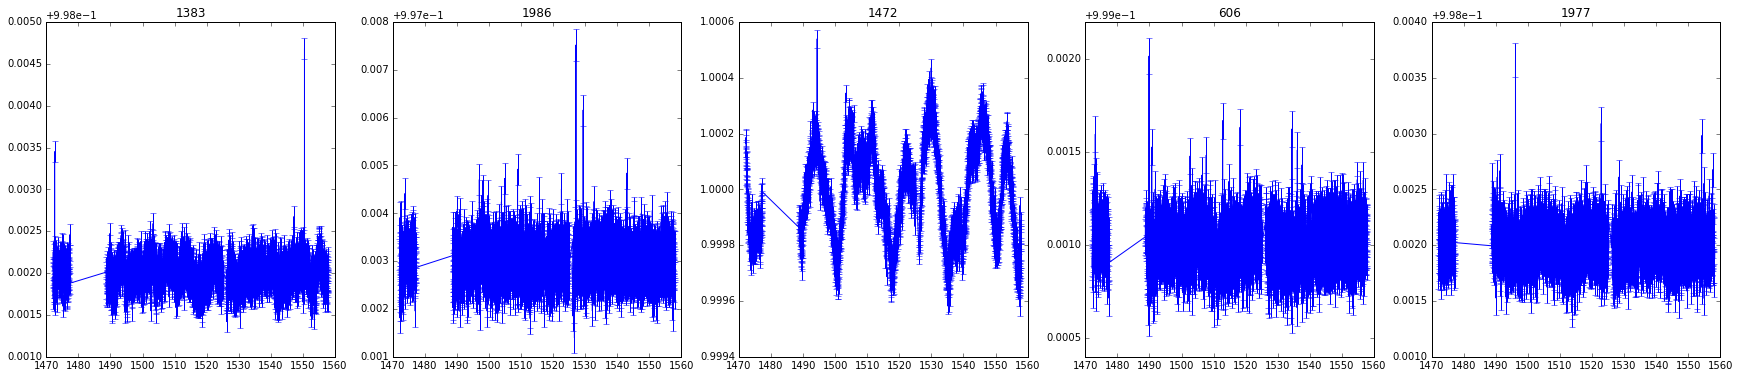

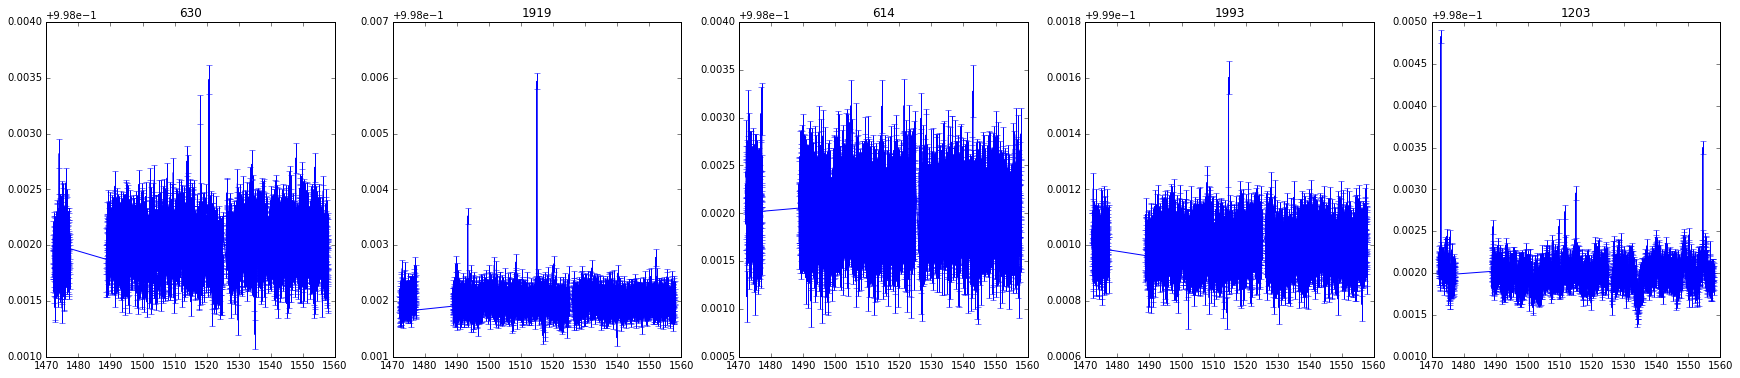

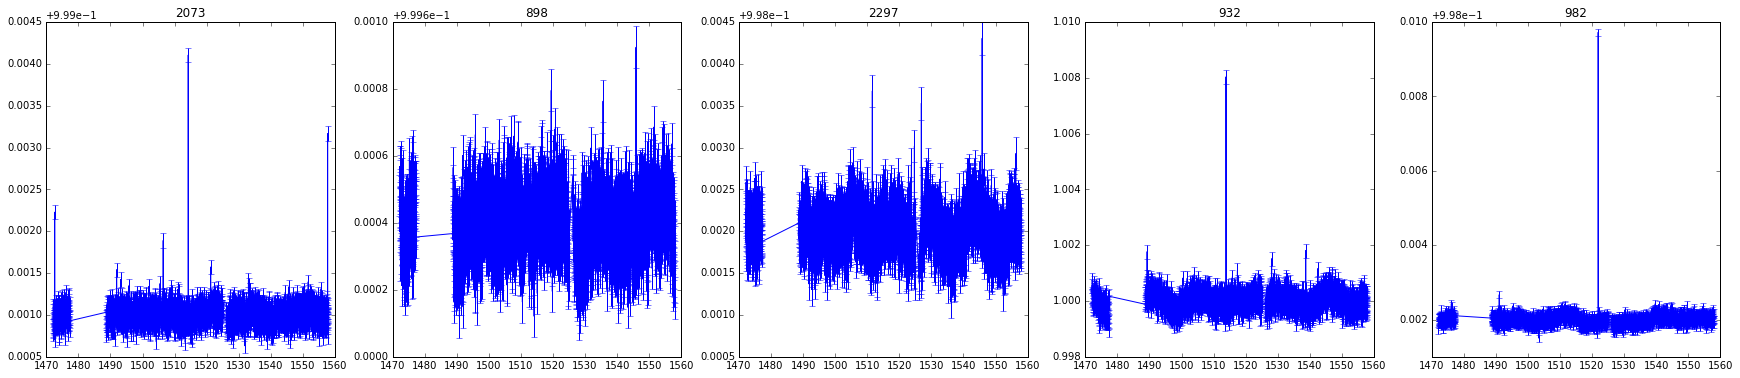

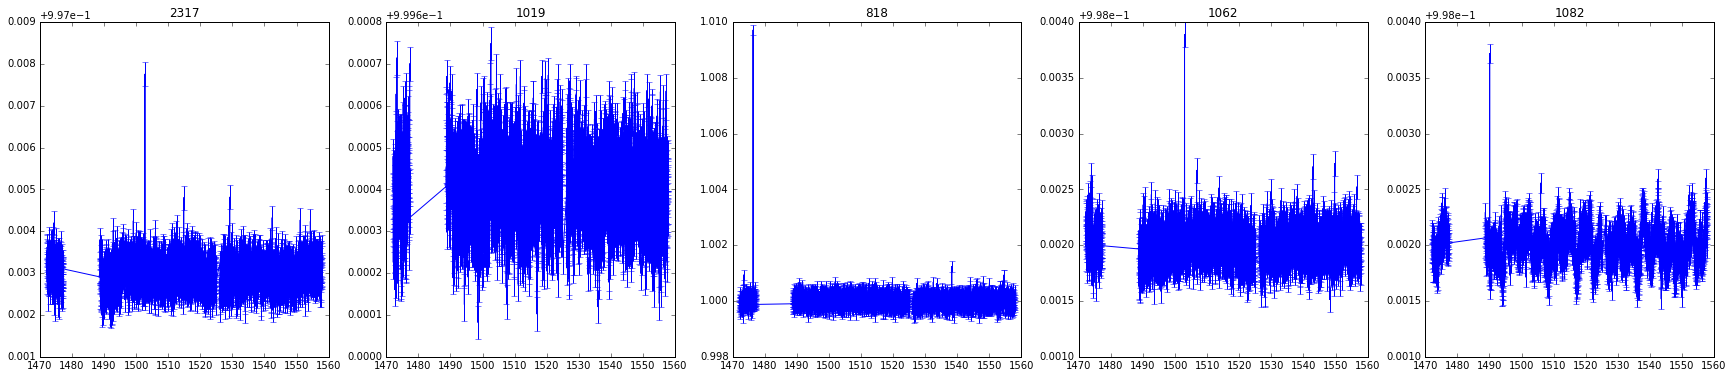

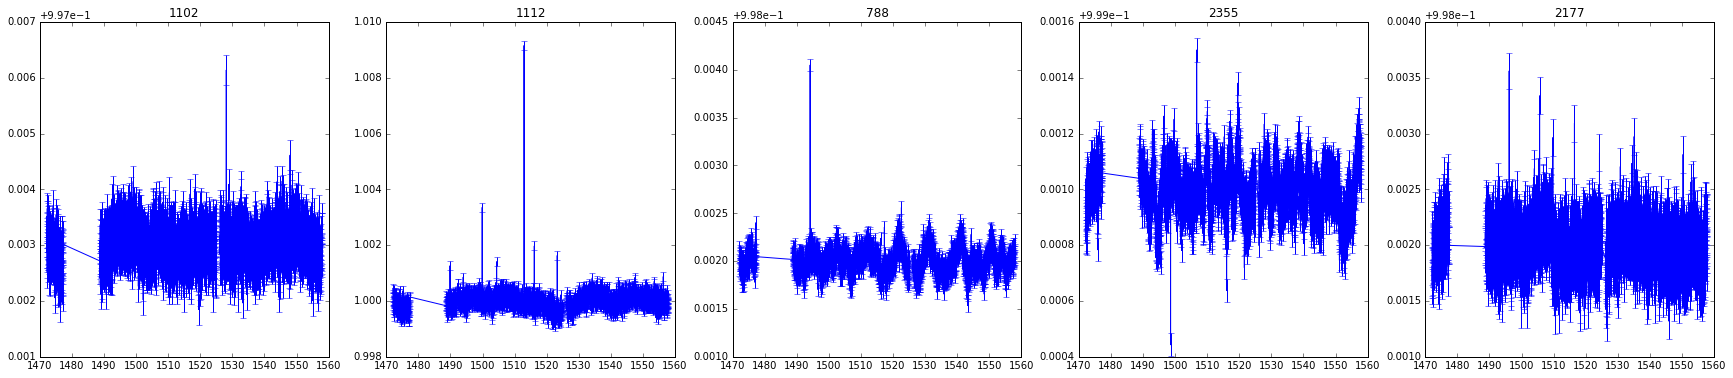

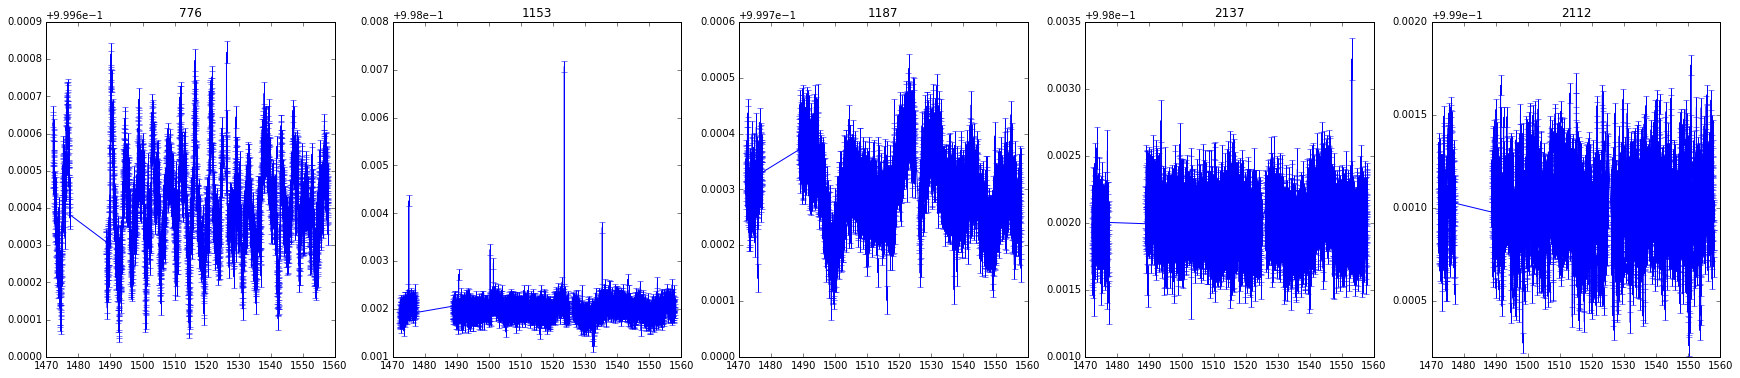

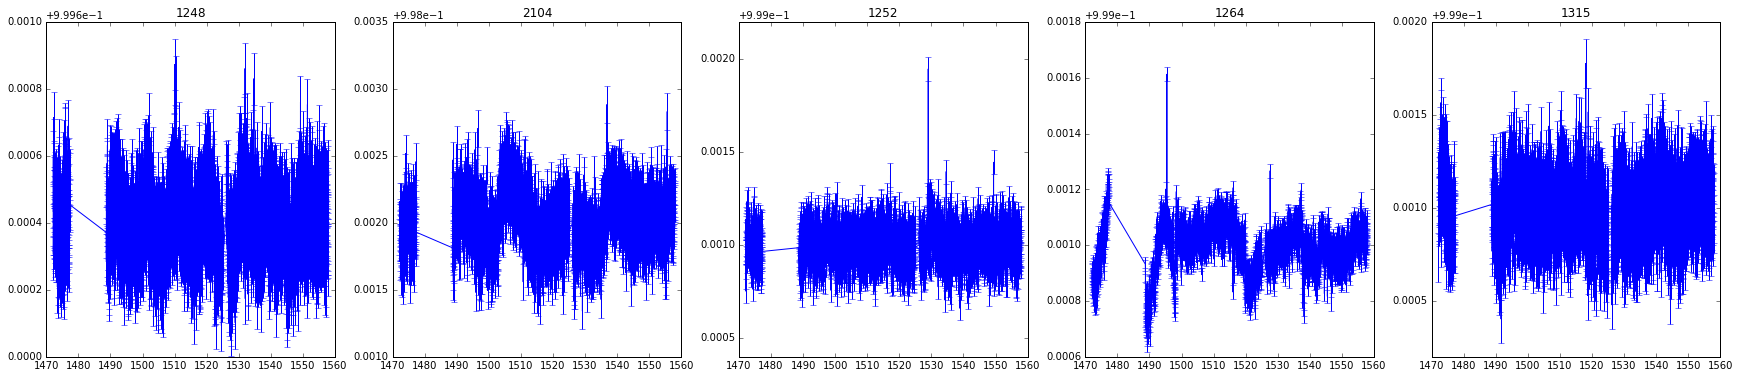

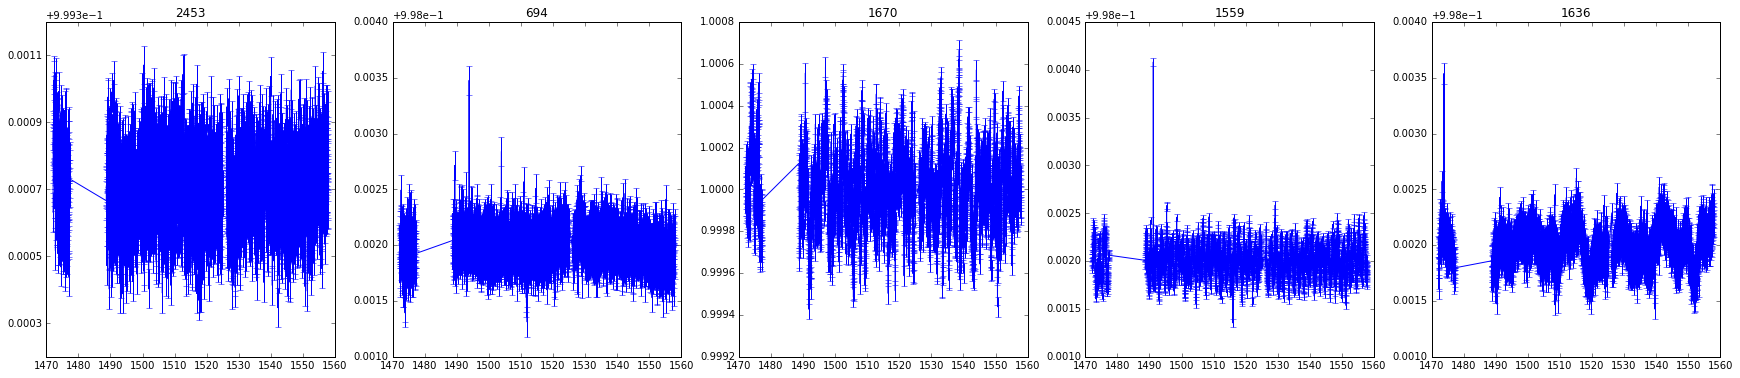

In [84]:
  for (i, ex) in enumerate(normal_idxs):
    
    if i % 5 == 0:
        #print("================= {} =============".format(scoresDense[i]))
        f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=(30, 6))
        ax0.errorbar(time[ex], flux[ex], unc[ex])
        ax0.set_title(ex)
    elif i % 5 == 1: 
        ax1.errorbar(time[ex], flux[ex], unc[ex])
        ax1.set_title(ex)
    elif i % 5 == 2: 
        ax2.errorbar(time[ex], flux[ex], unc[ex])
        ax2.set_title(ex)
    elif i % 5 == 3: 
        ax3.errorbar(time[ex], flux[ex], unc[ex])
        ax3.set_title(ex)
    else:
        ax4.errorbar(time[ex], flux[ex], unc[ex])
        ax4.set_title(ex)
        plt.show()  